<a href="https://colab.research.google.com/github/gapv09/Trabajos-Aplicativos/blob/main/TAREA_3_Desarrollo_Econ%C3%B3mico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DESARROLLO ECONÓMICO

## Pregunta N°1

In [8]:
import pandas as pd

df = pd.read_excel('Crecimiento_Tarea3.xlsx', sheet_name='Hoja2')

display(df.head())

,year,Peru,Colombia,Ecuador,South Africa,Chile,Malaysia,Romania,America Latina,Ingreso medio alto,United States
0,1950.0,3679.0,3432.0,2970.0,4041.0,5880.0,2485.0,1883.976806,3678.3459,4133.084218,15240.0
1,1951.0,3867.0,3427.0,2925.0,4130.0,6001.0,2295.0,2001.542797,NaN,NaN,16125.0
2,1952.0,3964.0,3529.0,3202.0,4175.0,6252.0,2345.0,2124.856375,NaN,NaN,16444.0
3,1953.0,4111.0,3629.0,3185.0,4264.0,6582.0,2295.0,2249.246952,NaN,NaN,16917.0
4,1954.0,4117.0,3759.0,3352.0,4404.0,6237.0,2375.0,2384.663375,NaN,NaN,16512.0


### Gráfico N° 1

In [ ]:
# Cargar el DataFrame de la Hoja2
df_hoja2 = pd.read_excel('Crecimiento_Tarea3.xlsx', sheet_name='Hoja2')

# Eliminar filas con valores nulos en la columna 'year' y convertir la columna 'year' a tipo entero en df_hoja2
df_hoja2.dropna(subset=['year'], inplace=True)
df_hoja2['year'] = df_hoja2['year'].astype(int)


# Ordenar los datos por año para asegurar el cálculo correcto del crecimiento anual
df_hoja2.sort_values(by=['year'], inplace=True)

# Identificar las columnas de PIB per cápita de los países individuales en Hoja2
# Excluimos 'year', 'America Latina', 'Ingreso medio alto', y 'United States' (si no queremos su crecimiento)
# Basado en el head previo de Hoja2, las columnas de países individuales son:
country_gdp_cols_hoja2 = ['Peru', 'Colombia', 'Ecuador', 'South Africa', 'Chile', 'Malaysia', 'Romania']


# Calcular la tasa de crecimiento anual del PIB per cápita para cada país
for country_col in country_gdp_cols_hoja2:
    growth_rate_col_name = f'{country_col}_growth_rate'
    # Usamos fill_method=None explícitamente para manejar los NaN y evitar el FutureWarning
    df_hoja2[growth_rate_col_name] = df_hoja2[country_col].pct_change(fill_method=None) * 100

# Filtrar los datos a partir del año 2000
df_growth_since_2000 = df_hoja2[df_hoja2['year'] >= 2000].copy() # Usamos .copy() para evitar SettingWithCopyWarning

# Seleccionar las columnas relevantes para mostrar (año y las nuevas columnas de crecimiento)
growth_rate_cols = [col for col in df_growth_since_2000.columns if col.endswith('_growth_rate')]
display_cols = ['year'] + growth_rate_cols

# Mostrar las primeras filas del DataFrame con las tasas de crecimiento a partir del 2000
display(df_growth_since_2000[display_cols].head())

# Opcional: Mostrar las últimas filas también
display(df_growth_since_2000[display_cols].tail())

,year,Peru_growth_rate,Colombia_growth_rate,Ecuador_growth_rate,South Africa_growth_rate,Chile_growth_rate,Malaysia_growth_rate,Romania_growth_rate
50,2000,1.565114,1.367813,0.340611,4.817232,2.459892,6.632273,7.197128
51,2001,-0.464032,0.367688,3.227318,3.387243,1.553980,-1.242971,10.867461
52,2002,4.395733,1.202023,3.204418,4.229557,0.400155,3.777328,10.345161
53,2003,3.154434,2.603255,1.478269,3.429674,1.930086,3.999194,8.019887
54,2004,3.996449,4.020925,6.566472,5.046097,4.236748,5.048656,12.401641


,year,Peru_growth_rate,Colombia_growth_rate,Ecuador_growth_rate,South Africa_growth_rate,Chile_growth_rate,Malaysia_growth_rate,Romania_growth_rate
68,2018,2.323168,0.785165,0.016366,0.048685,2.147629,3.597467,4.333046
69,2019,0.019556,0.877157,-1.212729,-1.123229,-1.133032,3.219806,-3.053861
70,2020,-12.171291,-9.018369,-8.887100,-7.672976,-7.838474,-6.569186,6.585131
71,2021,12.691667,9.503528,3.023319,4.004250,10.487511,1.998961,5.253593
72,2022,1.693212,6.755239,1.875486,1.266085,1.862310,7.527092,0.365164


In [ ]:
grupo_aspiracionales = ['Chile', 'Romania', 'Malaysia']
grupo_estructural = ['Colombia', 'Ecuador', 'South Africa']
periodos = [(2000, 2013), (2014, 2019), (2020, 2023)]

print("Grupo Aspiracionales:", grupo_aspiracionales)
print("Grupo Estructural:", grupo_estructural)
print("Períodos de análisis:", periodos)

Grupo Aspiracionales: ['Chile', 'Romania', 'Malaysia']
Grupo Estructural: ['Colombia', 'Ecuador', 'South Africa']
Períodos de análisis: [(2000, 2013), (2014, 2019), (2020, 2023)]


In [ ]:
display(df_growth_since_2000.head())

,year,Peru,Colombia,Ecuador,South Africa,Chile,Malaysia,Romania,America Latina,Ingreso medio alto,United States,Peru_growth_rate,Colombia_growth_rate,Ecuador_growth_rate,South Africa_growth_rate,Chile_growth_rate,Malaysia_growth_rate,Romania_growth_rate
50,2000,6038.244427,8496.791861,6908.242976,7582.778143,15211.623296,13474.701462,7089.946126,10132.749564,8833.692964,45886.470498,1.565114,1.367813,0.340611,4.817232,2.459892,6.632273,7.197128
51,2001,6010.225032,8528.033533,7131.193975,7839.625289,15448.008813,13307.214861,7860.443226,NaN,NaN,45878.009154,-0.464032,0.367688,3.227318,3.387243,1.553980,-1.242971,10.867461
52,2002,6274.418487,8630.542430,7359.707233,8171.206707,15509.824775,13809.872051,8673.618743,NaN,NaN,46266.295891,4.395733,1.202023,3.204418,4.229557,0.400155,3.777328,10.345161
53,2003,6472.340881,8855.217445,7468.503538,8451.452499,15809.177768,14362.155661,9369.233164,NaN,NaN,47157.995271,3.154434,2.603255,1.478269,3.429674,1.930086,3.999194,8.019887
54,2004,6731.004687,9211.279113,7958.920703,8877.920992,16478.972787,15087.251434,10531.171802,NaN,NaN,48492.717123,3.996449,4.020925,6.566472,5.046097,4.236748,5.048656,12.401641


In [ ]:
promedios_crecimiento = {}

todos_los_paises = grupo_aspiracionales + grupo_estructural

for pais in todos_los_paises:
    promedios_crecimiento[pais] = {}
    for inicio_periodo, fin_periodo in periodos:
        # Filtrar por país y período
        df_pais_periodo = df_growth_since_2000[
            (df_growth_since_2000['year'] >= inicio_periodo) &
            (df_growth_since_2000['year'] <= fin_periodo)
        ]

        # Calcular el promedio de crecimiento para el país en el período
        columna_crecimiento = f'{pais}_growth_rate'
        if columna_crecimiento in df_pais_periodo.columns:
            promedio = df_pais_periodo[columna_crecimiento].mean()
            promedios_crecimiento[pais][f'{inicio_periodo}-{fin_periodo}'] = promedio
        else:
            promedios_crecimiento[pais][f'{inicio_periodo}-{fin_periodo}'] = None # Handle missing columns

# Convertir el diccionario a un DataFrame para una mejor visualización
df_promedios_crecimiento = pd.DataFrame.from_dict(promedios_crecimiento, orient='index')

display(df_promedios_crecimiento)

,2000-2013,2014-2019,2020-2023
Chile,2.588941,0.589509,1.503783
Romania,7.397365,4.820104,4.067963
Malaysia,3.660391,3.765700,0.985622
Colombia,2.987785,1.244908,2.413466
Ecuador,3.262224,-0.258866,-1.329432
South Africa,3.730782,-0.429995,-0.800880


In [ ]:
promedios_por_grupo_periodo = {}

for inicio_periodo, fin_periodo in periodos:
    periodo_str = f'{inicio_periodo}-{fin_periodo}'

    # Calcular el promedio para el grupo Aspiracionales
    if all(pais in df_promedios_crecimiento.index for pais in grupo_aspiracionales):
        promedio_aspiracionales = df_promedios_crecimiento.loc[grupo_aspiracionales, periodo_str].mean()
    else:
        promedio_aspiracionales = None # Handle cases where a country is missing

    # Calcular el promedio para el grupo Estructural
    if all(pais in df_promedios_crecimiento.index for pais in grupo_estructural):
        promedio_estructural = df_promedios_crecimiento.loc[grupo_estructural, periodo_str].mean()
    else:
        promedio_estructural = None # Handle cases where a country is missing


    promedios_por_grupo_periodo[periodo_str] = {
        'Aspiracionales': promedio_aspiracionales,
        'Estructural': promedio_estructural
    }

# Convertir el diccionario a un DataFrame
df_promedios_por_grupo_periodo = pd.DataFrame.from_dict(promedios_por_grupo_periodo, orient='index')

# Mostrar el DataFrame resultante
display(df_promedios_por_grupo_periodo)

,Aspiracionales,Estructural
2000-2013,4.548899,3.326930
2014-2019,3.058438,0.185349
2020-2023,2.185789,0.094385


In [ ]:
promedios_crecimiento_peru = {}

for inicio_periodo, fin_periodo in periodos:
    # Filtrar por Perú y período
    df_peru_periodo = df_growth_since_2000[
        (df_growth_since_2000['year'] >= inicio_periodo) &
        (df_growth_since_2000['year'] <= fin_periodo)
    ]

    # Calcular el promedio de crecimiento para Perú en el período
    # La columna de crecimiento para Perú es 'Peru_growth_rate'
    if 'Peru_growth_rate' in df_peru_periodo.columns:
        promedio = df_peru_periodo['Peru_growth_rate'].mean()
        promedios_crecimiento_peru[f'{inicio_periodo}-{fin_periodo}'] = promedio
    else:
        promedios_crecimiento_peru[f'{inicio_periodo}-{fin_periodo}'] = None # Handle missing column


# Convertir el diccionario a un DataFrame para una mejor visualización
df_promedios_crecimiento_peru = pd.DataFrame.from_dict(promedios_crecimiento_peru, orient='index', columns=['Peru_Average_Growth_Rate'])

# Mostrar el DataFrame resultante
display(df_promedios_crecimiento_peru)

,Peru_Average_Growth_Rate
2000-2013,4.642749
2014-2019,2.136802
2020-2023,0.737863


In [ ]:
# Mostrar el DataFrame combinado con los promedios de crecimiento por período
display(df_combined_growth)

,Aspiracionales,Estructural,Peru
2000-2013,4.548899,3.326930,4.642749
2014-2019,3.058438,0.185349,2.136802
2020-2023,2.185789,0.094385,0.737863


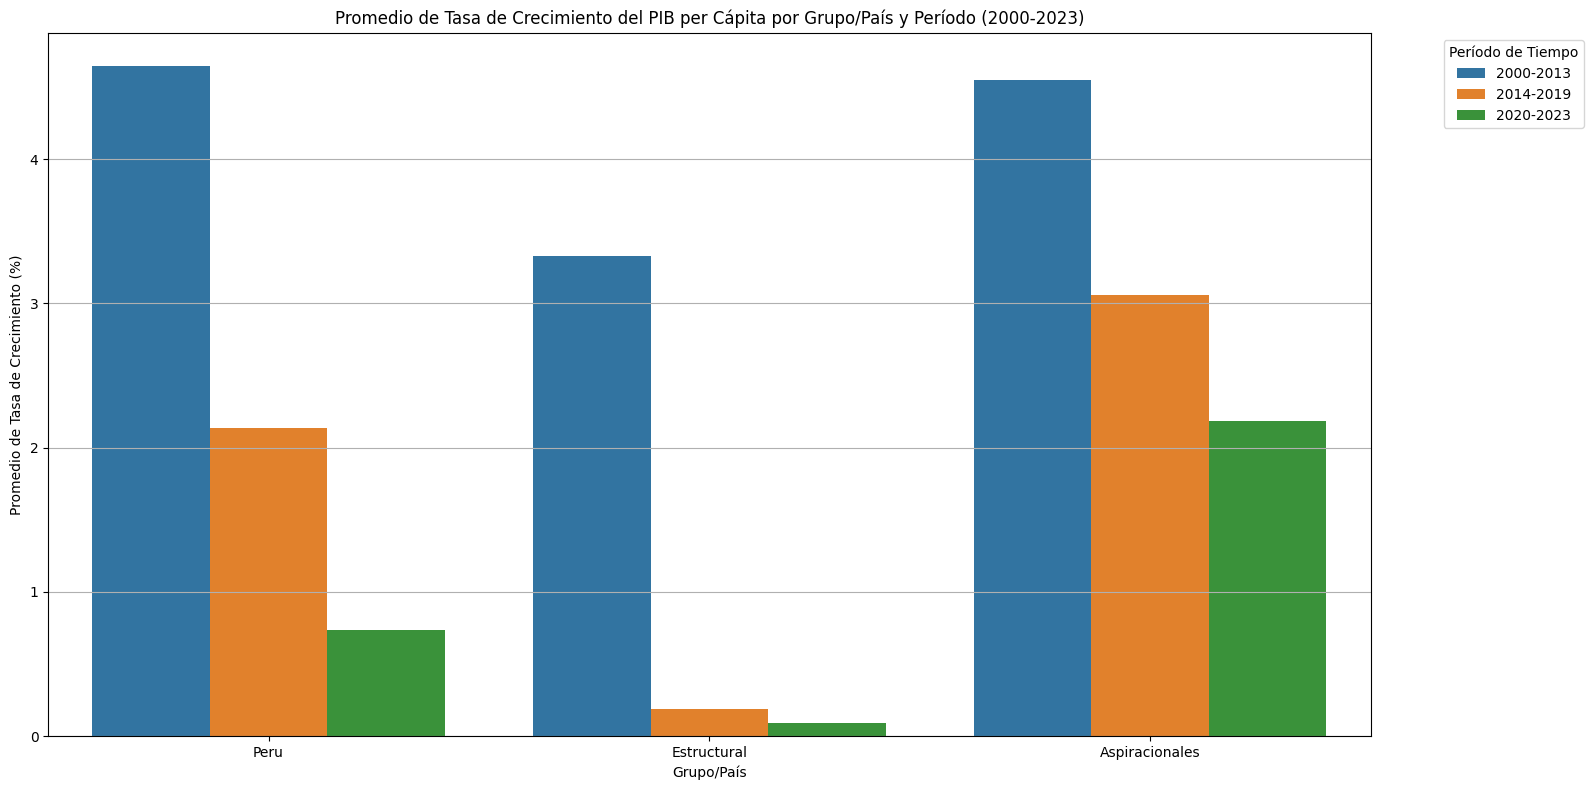

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurarse de que el DataFrame combinado esté disponible
# df_combined_growth (calculado previamente)

# Reorganizar los datos para el gráfico de barras deseado
# Usaremos melt para transformar las columnas de entidades en filas
df_melted_growth = df_combined_growth.reset_index().melt(
    id_vars='index',
    var_name='Grupo/País',
    value_name='Promedio de Crecimiento (%)'
)

# Renombrar la columna 'index' a 'Período de Tiempo'
df_melted_growth = df_melted_growth.rename(columns={'index': 'Período de Tiempo'})

# Definir el orden deseado para las entidades en el gráfico
order = ['Peru', 'Estructural', 'Aspiracionales']

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(16, 8))
sns.barplot(data=df_melted_growth, x='Grupo/País', y='Promedio de Crecimiento (%)', hue='Período de Tiempo', order=order)

plt.title('Promedio de Tasa de Crecimiento del PIB per Cápita por Grupo/País y Período (2000-2023)')
plt.xlabel('Grupo/País')
plt.ylabel('Promedio de Tasa de Crecimiento (%)')
plt.grid(axis='y')
plt.legend(title='Período de Tiempo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Gráfico N° 1.2


In [9]:
df.dropna(subset=['year'], inplace=True)
df['year'] = df['year'].astype(int)
display(df.head())

,year,Peru,Colombia,Ecuador,South Africa,Chile,Malaysia,Romania,America Latina,Ingreso medio alto,United States
0,1950,3679.0,3432.0,2970.0,4041.0,5880.0,2485.0,1883.976806,3678.3459,4133.084218,15240.0
1,1951,3867.0,3427.0,2925.0,4130.0,6001.0,2295.0,2001.542797,NaN,NaN,16125.0
2,1952,3964.0,3529.0,3202.0,4175.0,6252.0,2345.0,2124.856375,NaN,NaN,16444.0
3,1953,4111.0,3629.0,3185.0,4264.0,6582.0,2295.0,2249.246952,NaN,NaN,16917.0
4,1954,4117.0,3759.0,3352.0,4404.0,6237.0,2375.0,2384.663375,NaN,NaN,16512.0


In [10]:
us_gdp = df['United States']
country_cols = df.columns.drop(['year', 'United States', 'America Latina', 'Ingreso medio alto'])

for country in country_cols:
    new_col_name = f'{country}_percentage'
    df[new_col_name] = (df[country] / us_gdp) * 100

display(df.head())

,year,Peru,Colombia,Ecuador,South Africa,Chile,Malaysia,Romania,America Latina,Ingreso medio alto,United States,Peru_percentage,Colombia_percentage,Ecuador_percentage,South Africa_percentage,Chile_percentage,Malaysia_percentage,Romania_percentage
0,1950,3679.0,3432.0,2970.0,4041.0,5880.0,2485.0,1883.976806,3678.3459,4133.084218,15240.0,24.140420,22.519685,19.488189,26.515748,38.582677,16.305774,12.362053
1,1951,3867.0,3427.0,2925.0,4130.0,6001.0,2295.0,2001.542797,NaN,NaN,16125.0,23.981395,21.252713,18.139535,25.612403,37.215504,14.232558,12.412669
2,1952,3964.0,3529.0,3202.0,4175.0,6252.0,2345.0,2124.856375,NaN,NaN,16444.0,24.106057,21.460715,19.472148,25.389200,38.019946,14.260521,12.921773
3,1953,4111.0,3629.0,3185.0,4264.0,6582.0,2295.0,2249.246952,NaN,NaN,16917.0,24.300999,21.451794,18.827215,25.205415,38.907608,13.566235,13.295779
4,1954,4117.0,3759.0,3352.0,4404.0,6237.0,2375.0,2384.663375,NaN,NaN,16512.0,24.933382,22.765262,20.300388,26.671512,37.772529,14.383479,14.442002


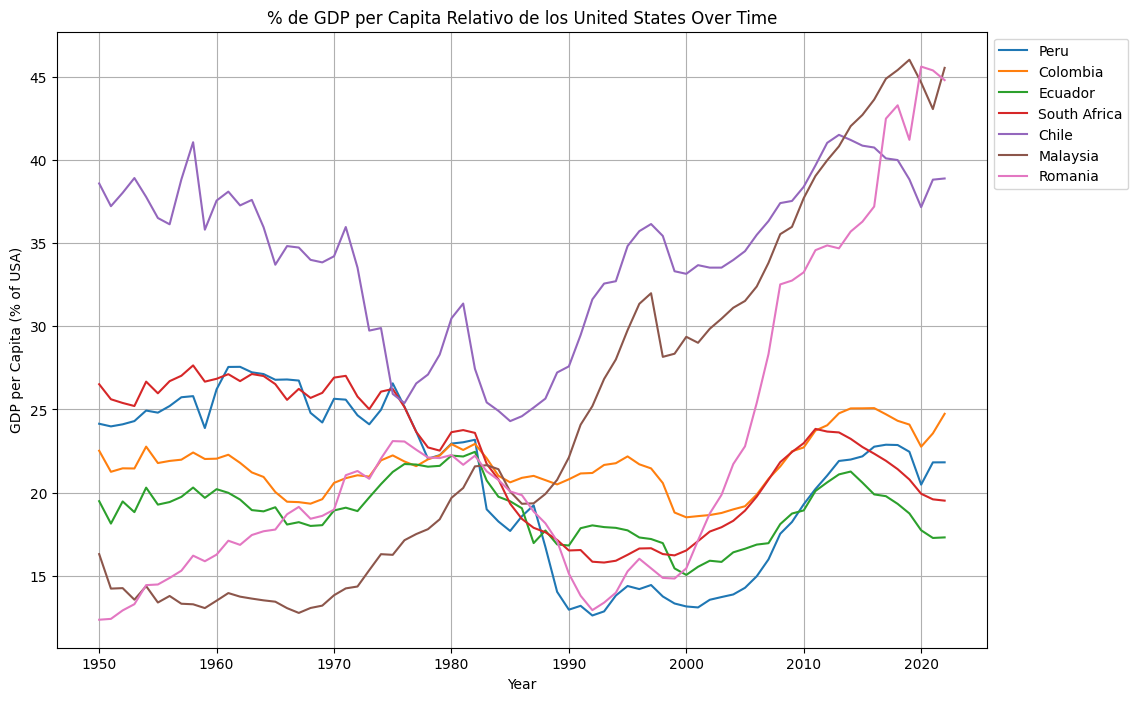

In [11]:
import matplotlib.pyplot as plt

percentage_cols = [col for col in df.columns if col.endswith('_percentage')]
plot_df = df[['year'] + percentage_cols]

plt.figure(figsize=(12, 8))

for col in percentage_cols:
    plt.plot(plot_df['year'], plot_df[col], label=col.replace('_percentage', ''))

plt.title('% de GDP per Capita Relativo de los United States Over Time')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (% of USA)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

## Pregunta N° 1.2

### Fundamentos del Banco Mundial para considerar pares estructurales de Perú a Ecuador, Colombia y Sudáfrica, y pares aspiracionales a Chile, Malasia y Rumania.

* **Fundamentos y Datos que respaldan la clasificación:**

El Banco Mundial indica que los pares se identifican de acuerdo con:

- PIB per cápita
- Población
- Exportaciones de productos básicos
- Desempeño ambiental
- Gobernanza

Veamos estos indicadores para cada grupo de países:

* **Pares Estructurales: Ecuador, Colombia y Sudáfrica**

La idea es que estos países comparten con Perú una estructura económica y ciertos niveles de desarrollo que los hacen comparables.

1. PIB per cápita (dólares corrientes):

- Perú: Aproximadamente $7,910 - $8,292 (PWT).
- Colombia: $8,000 - $9,000
- Ecuador: $7,000 - $8,000
- Sudáfrica: Aproximadamente $7,022 - $8,500.

Análisis: Los datos sugieren que el PIB per cápita de Sudáfrica es algo inferior al de Perú, pero ambos se encuentran dentro de un rango comparable de países de ingreso medio-alto. La cercanía geográfica y la pertenencia a América Latina para Ecuador y Colombia también implican desafíos y oportunidades similares.

2. Población (2023/2024):

- Perú: Aproximadamente 34.39 millones.
- Ecuador: 18 millones
- Colombia: 52 millones
- Sudáfrica: 60 millones

Análisis: Si bien los números absolutos varían, se espera que el Banco Mundial considere la escala de sus mercados internos, la distribución demográfica y los desafíos relacionados con el tamaño de la fuerza laboral y el acceso a servicios para su población.

3. Exportaciones de productos básicos:

- Perú: Principalmente cobre, oro, zinc y otros minerales, productos pesqueros y agroindustriales (OEC). La minería es un pilar fundamental.
- Ecuador: Petróleo, banano, camarones, flores, cacao. Fuerte dependencia de materias primas.
- Colombia: Petróleo, carbón, café, flores. También con una dependencia significativa de commodities.
- Sudáfrica: Minerales (platino, oro, diamantes, carbón), metales, vehículos, productos agrícolas. También una economía extractiva.

Análisis: Todos estos países comparten una característica clave: sus economías tienen una dependencia significativa de la exportación de productos básicos (commodities). Esto los expone a la volatilidad de los precios internacionales y los desafíos de la diversificación económica.

4. Desempeño ambiental (Índice de Desempeño Ambiental - EPI 2022):

- Perú: Puesto 101 de 180 países, con un puntaje de 39.8 (Stakeholders, Parlamento Andino).
- Ecuador: Puntaje de 46.5, entre los mejores de la región andina (Parlamento Andino).
- Colombia: Destaca en manejo de residuos (Parlamento Andino).
- Sudáfrica: (No se encontró un dato específico del EPI en la búsqueda, pero se espera que se encuentre en un rango comparable a los otros países estructurales en términos de desafíos ambientales).

Análisis: Perú, Ecuador y Colombia son países con alta biodiversidad y desafíos importantes en conservación y manejo de recursos, así como en la gestión del impacto de las industrias extractivas. Las similitudes en la presión sobre los ecosistemas y la capacidad institucional para gestionarlos justificarían su agrupamiento.

5. Gobernanza (Índices de Gobernanza Mundial del Banco Mundial - WGI):

Los WGI miden seis dimensiones de gobernanza en una escala de -2.5 a 2.5, donde valores más altos indican mejor gobernanza. Se expresan en percentiles (0-100), donde un percentil más alto indica mejor desempeño relativo.

Aunque no se encontraron los datos más recientes específicos para todos los países en la búsqueda, los datos históricos y las menciones generales sugieren que:

- Perú: Ha mostrado fluctuaciones en estabilidad política y estado de derecho (BCRP 2021), con desafíos en la efectividad gubernamental y el control de la corrupción. Por ejemplo, el control de la corrupción para Perú en 2021 se ubicaba en el percentil 33.3 (World Bank DataBank).
- Ecuador y Colombia: También han enfrentado desafíos de gobernanza similares a Perú en términos de estabilidad política, corrupción e institucionalidad.
- Sudáfrica: Si bien es una democracia consolidada, también ha lidiado con problemas de corrupción y desigualdad, lo que podría situarla en un rango comparable a los países latinoamericanos en algunos indicadores de gobernanza.

Análisis: La similitud en los desafíos de gobernanza, como la corrupción, la efectividad del gobierno y la estabilidad institucional, es un factor clave para que el Banco Mundial los agrupe como pares estructurales.

* **Pares Aspiracionales: Chile, Malasia y Rumania**

La razón para que sean "aspiracionales" es que, en los mismos indicadores, han logrado un desempeño superior al de Perú, lo que los convierte en ejemplos a seguir.

1. PIB per cápita (dólares corrientes, 2023/2024):

- Perú: Aproximadamente $7,910 - $8,292
- Chile: Aproximadamente $16,086 - $33,284 (PWT).
- Malasia: Aproximadamente 14,400 (OEC 2023).
- Rumania: Aproximadamente $12,400 (es una economía en crecimiento dentro de la UE, con un PIB per cápita significativamente mayor que Perú).

Análisis: Es evidente que Chile, Malasia y Rumania tienen un PIB per cápita considerablemente más alto que Perú, lo que indica un mayor nivel de desarrollo económico y, en teoría, una mejor calidad de vida para sus ciudadanos.

2. Población (2023):

- Perú: 34.39 millones
- Chile: 20.86 millones
- Malasia: 33 millones
- Rumania: 19 millones

Análisis: La población de Chile y Rumania es menor que la de Perú, lo que podría influir en la gestión de recursos y el tamaño del mercado. Malasia tiene una población más comparable. Sin embargo, el punto es cómo han logrado un mayor desarrollo a pesar de su demografía, quizás con una mayor productividad o mejor distribución de la riqueza.

3. Exportaciones de productos básicos y Diversificación Económica:

- Perú: Fuerte dependencia de la minería y productos primarios. 0.18 (PWT)
- Chile: Aunque también depende del cobre, ha logrado una mayor diversificación en sectores como la fruticultura, vitivinicultura, servicios y productos forestales. Su economía tiene una mayor complejidad. 0.17M (PWT)
- Malasia: Ha diversificado exitosamente su economía hacia la manufactura (electrónica, maquinaria), servicios y alta tecnología, aunque también exporta petróleo y aceite de palma. Su complejidad económica es significativamente mayor que la de Perú (OEC: Malasia ECI 1.04 vs Perú ECI -0.61). 0.43 (PWT)
- Rumania: Ha transitado hacia una economía más industrializada y de servicios (automotriz, TI, manufactura), con menor dependencia de productos básicos. Su complejidad económica es significativamente mayor que la de Perú (OEC: Rumania ECI 1.02 vs Perú ECI -0.61). 0.20 (PWT)

Análisis: La clave aquí es la diversificación económica y la complejidad económica. Chile, Malasia y Rumania han logrado construir economías menos dependientes de los commodities y con mayor valor agregado en sus exportaciones, lo que los hace más resilientes a las fluctuaciones de los mercados internacionales.

4. Desempeño ambiental (Índice de Desempeño Ambiental - EPI 2022):

- Perú: Puesto 101, puntaje 39.8.
- Chile: Puntaje de 46.7, siendo el país andino con mejor desempeño en el EPI (Parlamento Andino).
- Malasia y Rumania: (No se encontraron datos específicos en la búsqueda, pero se espera que, como economías más desarrolladas, tengan marcos regulatorios y políticas ambientales más avanzadas o mejor implementadas).

Análisis: Una mejor capacidad de gestión ambiental y sostenibilidad, posiblemente debido a mayor inversión o institucionalidad, los coloca como aspiracionales.

5. Gobernanza (Índices de Gobernanza Mundial del Banco Mundial - WGI):

- Perú: Percentiles en el rango bajo-medio (ej. Control de Corrupción 33.3).
- Chile: Consistentemente uno de los países con mejor gobernanza en América Latina, con indicadores de control de la corrupción, estado de derecho y efectividad gubernamental significativamente más altos que Perú (Datos del Banco Mundial suelen mostrar a Chile en percentiles mucho más altos, alrededor del 80-90 en varias categorías).
- Malasia y Rumania: Aunque con sus propios desafíos, en general, han logrado un mayor avance en la consolidación institucional y la lucha contra la corrupción en comparación con Perú, especialmente Rumania como miembro de la Unión Europea, sujeta a estándares de gobernanza más estrictos.

Análisis: La mejora en los indicadores de gobernanza (estabilidad política, efectividad gubernamental, estado de derecho, control de la corrupción, calidad regulatoria) es un diferenciador clave para que estos países sean considerados aspiracionales. Una gobernanza más sólida se correlaciona con un mayor desarrollo económico y social.

### **Conclusión:**

El Banco Mundial utiliza estos grupos de países para realizar comparaciones de desempeño (benchmarking) y para identificar políticas y reformas que podrían ser relevantes para Perú.

Los pares estructurales (Ecuador, Colombia, Sudáfrica) sirven para comparar el desempeño de Perú en contextos económicos y sociales similares, permitiendo identificar desafíos y oportunidades comunes, así como aprender de las experiencias de países que enfrentan situaciones análogas. Por ejemplo, si Colombia o Ecuador han implementado una política fiscal exitosa, podría ser replicable en Perú.

Los pares aspiracionales (Chile, Malasia, Rumania) son modelos de desarrollo que Perú podría emular. Han logrado avances significativos en diversificación económica, mejora de la gobernanza y desarrollo humano. El análisis de sus trayectorias permite identificar reformas estructurales y políticas públicas que han contribuido a su éxito, ofreciendo una hoja de ruta para que Perú alcance niveles de desarrollo más altos. Por ejemplo, la experiencia de Malasia en el desarrollo de sectores de alta tecnología o la solidez institucional de Chile.

## Pregunta N° 2

In [2]:
import pandas as pd

df = pd.read_excel('Crecimiento_Tarea3.xlsx', sheet_name='Hoja1')

display(df.head())

,country,year,Y,N,L,A,K,1-alpha,Kh,fbkf,cgob,x,m,i
0,Peru,1950,29361.533203,7.786966,2.637480,NaN,51687.773438,0.738903,1.389781,0.100740,0.110252,0.122778,-0.084300,0.155022
1,Peru,1951,31765.531250,7.984586,2.684703,NaN,57297.187500,0.738903,1.399023,0.133356,0.107530,0.119823,-0.118976,0.167766
2,Peru,1952,33746.871094,8.188123,2.737932,NaN,63308.621094,0.738903,1.408327,0.146579,0.113842,0.126486,-0.120247,0.116461
3,Peru,1953,35547.750000,8.398700,2.792747,NaN,69372.281250,0.738903,1.417692,0.149293,0.111397,0.125011,-0.114724,0.094615
4,Peru,1954,37841.167969,8.617949,2.849646,1.201944,73584.937500,0.738903,1.427119,0.120197,0.124010,0.124399,-0.093233,0.112448


## Calcular el PIB per cápita

### Subtask:
Calcular el PIB per cápita utilizando la fórmula Y/L = A * (K/L)^alpha * (L/N), donde alpha = 1 - (1-alpha).

In [3]:
# Calcular alpha a partir de la columna '1-alpha'
df['alpha'] = 1 - df['1-alpha']

# Calcular K/L
df['K_over_L'] = df['K'] / df['L']

# Calcular L/N
df['L_over_N'] = df['L'] / df['N']

# Calcular el PIB per cápita (Y/L) usando la fórmula
# Aseguramos que no haya valores nulos en 'A' antes de la potencia
df['Y_over_L_calculated'] = df['A'] * (df['K_over_L']**df['alpha']) * df['L_over_N']

# Muestra las primeras filas con la nueva columna calculada
display(df.head())

,country,year,Y,N,L,A,K,1-alpha,Kh,fbkf,cgob,x,m,i,alpha,K_over_L,L_over_N,Y_over_L_calculated
0,Peru,1950,29361.533203,7.786966,2.637480,NaN,51687.773438,0.738903,1.389781,0.100740,0.110252,0.122778,-0.084300,0.155022,0.261097,19597.406753,0.338704,NaN
1,Peru,1951,31765.531250,7.984586,2.684703,NaN,57297.187500,0.738903,1.399023,0.133356,0.107530,0.119823,-0.118976,0.167766,0.261097,21342.098286,0.336236,NaN
2,Peru,1952,33746.871094,8.188123,2.737932,NaN,63308.621094,0.738903,1.408327,0.146579,0.113842,0.126486,-0.120247,0.116461,0.261097,23122.788244,0.334378,NaN
3,Peru,1953,35547.750000,8.398700,2.792747,NaN,69372.281250,0.738903,1.417692,0.149293,0.111397,0.125011,-0.114724,0.094615,0.261097,24840.163674,0.332521,NaN
4,Peru,1954,37841.167969,8.617949,2.849646,1.201944,73584.937500,0.738903,1.427119,0.120197,0.124010,0.124399,-0.093233,0.112448,0.261097,25822.482911,0.330664,5.639373


In [ ]:
# Filtrar el DataFrame para mostrar solo los datos de Perú
peru_df = df[df['country'] == 'Peru']

# Seleccionar las columnas relevantes (año y PIB per cápita calculado)
peru_pib_per_capita = peru_df[['year', 'Y_over_L_calculated']]

# Mostrar la tabla
display(peru_pib_per_capita)

,year,Y_over_L_calculated
0,1950,NaN
1,1951,NaN
2,1952,NaN
3,1953,NaN
4,1954,5.639373
...,...,...
65,2015,224.932456
66,2016,242.348139
67,2017,262.969940
68,2018,273.361521


In [ ]:
# Mostrar las últimas filas de la tabla pivoteada
display(pivoted_df.tail())

country,Chile,Colombia,Ecuador,Malaysia,Peru,Romania,South Africa
year,,,,,,,
2015,435.417786,140.853040,23.773758,705.314273,224.932456,333.106468,60.778446
2016,436.929282,139.146131,23.622158,722.587729,242.348139,246.606206,54.964971
2017,436.783423,135.304047,23.796802,751.544080,262.969940,213.435345,53.412571
2018,447.645929,139.138828,23.610173,775.290440,273.361521,187.377664,52.389133
2019,448.380943,141.082724,23.409897,796.704701,274.198395,195.890460,51.274867


## Productividad Total de Factores "A" por país a lo largo del tiempo

### Subtask:
Crear un gráfico de serie de tiempo que muestre los valores de la columna "A" para cada país a lo largo de los años.

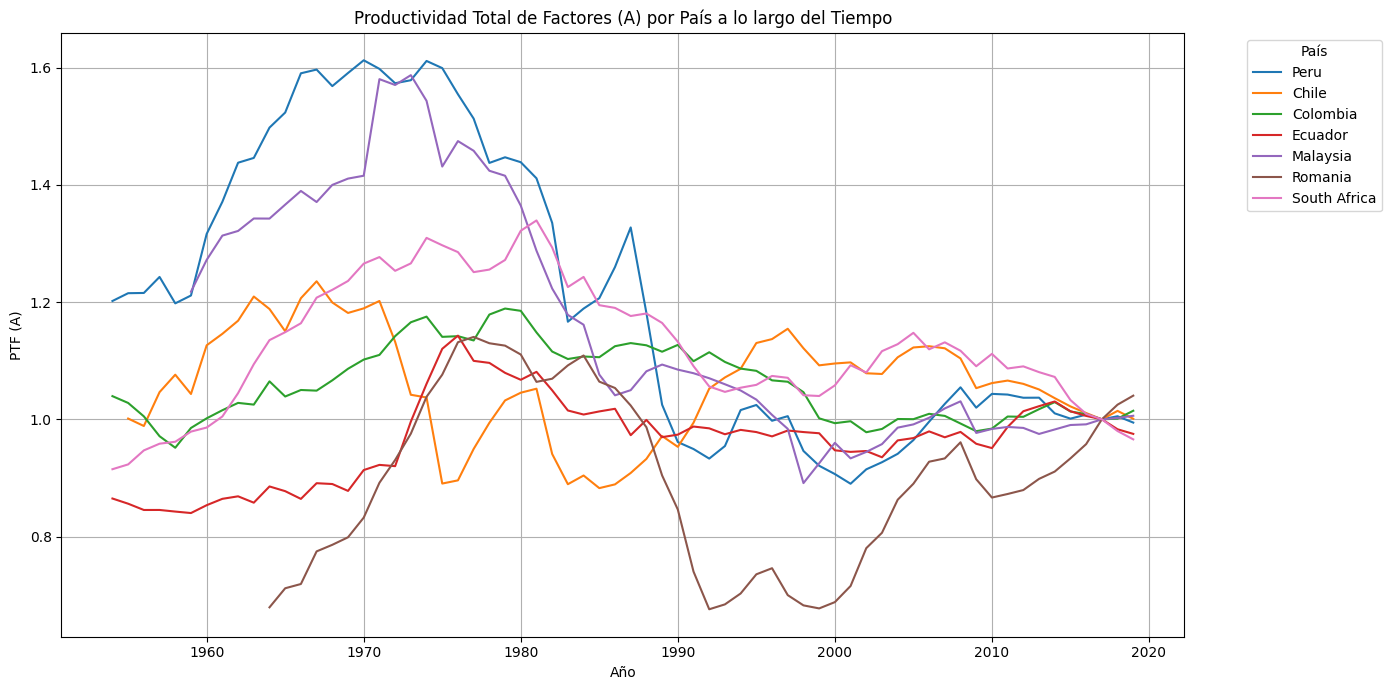

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas relevantes
plot_data_A = df[['year', 'country', 'A']]

# Eliminar filas con valores nulos en la columna 'A' para asegurar una visualización limpia
plot_data_A = plot_data_A.dropna(subset=['A'])

# Crear el gráfico de serie de tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=plot_data_A, x='year', y='A', hue='country')

plt.title('Productividad Total de Factores (A) por País a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('PTF (A)')
plt.grid(True)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Tendencia General de Perú:

Perú mostró un crecimiento significativo de la PTF entre finales de los años 50 y mediados de los 70, alcanzando un pico cercano a 1.6.
A partir de mediados de los 70, la PTF de Perú experimentó una fuerte caída, especialmente en la década de los 80 (posiblemente reflejando la crisis económica y política de esa época).
Después de tocar un mínimo en los años 90, la PTF de Perú mostró una recuperación y estabilización, terminando alrededor de 1.0 en 2020, similar a la mayoría de los países al final del período.
Comparación con Pares Estructurales (Colombia, Ecuador, Sudáfrica):

### Ecuador y Colombia:
Sus líneas de PTF muestran un comportamiento más estable en comparación con Perú, fluctuando en un rango más acotado (principalmente entre 0.8 y 1.2). A partir de los años 90, sus PTF tienden a converger alrededor de 1.0.
Sudáfrica: Su PTF muestra una tendencia a la baja en las primeras décadas, recuperándose ligeramente y manteniéndose por debajo de 1.0 en la mayor parte del período posterior a 1980, aunque muestra una leve recuperación al final.
Comparación con Pares Aspiracionales (Chile, Malasia, Rumanía):

### Chile:
Muestra un crecimiento de PTF significativo a partir de los años 80, superando a la mayoría de los países y manteniéndose en un nivel alto hasta principios de los 2000, con una ligera disminución y estabilización hacia 1.0 al final del período.
### Malasia:
Se destaca por un crecimiento constante y sostenido de la PTF desde los años 60 hasta principios de los 90, manteniéndose en niveles elevados (por encima de 1.2) durante gran parte de ese tiempo. Luego experimenta un descenso y se estabiliza alrededor de 1.0.
Rumanía: La línea de Rumanía es notable por su alto crecimiento en las primeras décadas (superando a Perú en los años 70) y luego una caída más pronunciada que otros países en los años 90, antes de una recuperación y estabilización alrededor de 1.0 al final del período.

### Convergencia al Final del Período:

Hacia el año 2020, la mayoría de los países representados, incluidos Perú, Chile, Colombia, Ecuador, Malasia y Rumanía, parecen converger en un valor de PTF cercano a 1.0. Esto sugiere que, a pesar de sus trayectorias individuales, la productividad total de factores se ha nivelado al final del período analizado para estos países. Sudáfrica se mantiene ligeramente por debajo pero también muestra una tendencia al alza hacia ese punto.
En resumen, el gráfico ilustra las diversas trayectorias de productividad total de factores entre estos países. Mientras Perú experimentó un "boom" inicial seguido de una fuerte caída y recuperación, países aspiracionales como Chile y Malasia mostraron un crecimiento más sostenido o a largo plazo, aunque todos tienden a converger en el valor de 1.0 hacia 2020. Esto es crucial para entender las dinámicas de crecimiento económico, ya que la PTF es un indicador clave de la eficiencia con la que una economía utiliza sus insumos.

## Dotación de capital por trabajador "K/L" por país a lo largo del tiempo

### Subtask:
Crear un gráfico de serie de tiempo que muestre los valores de la columna "K_over_L" para cada país a lo largo de los años.

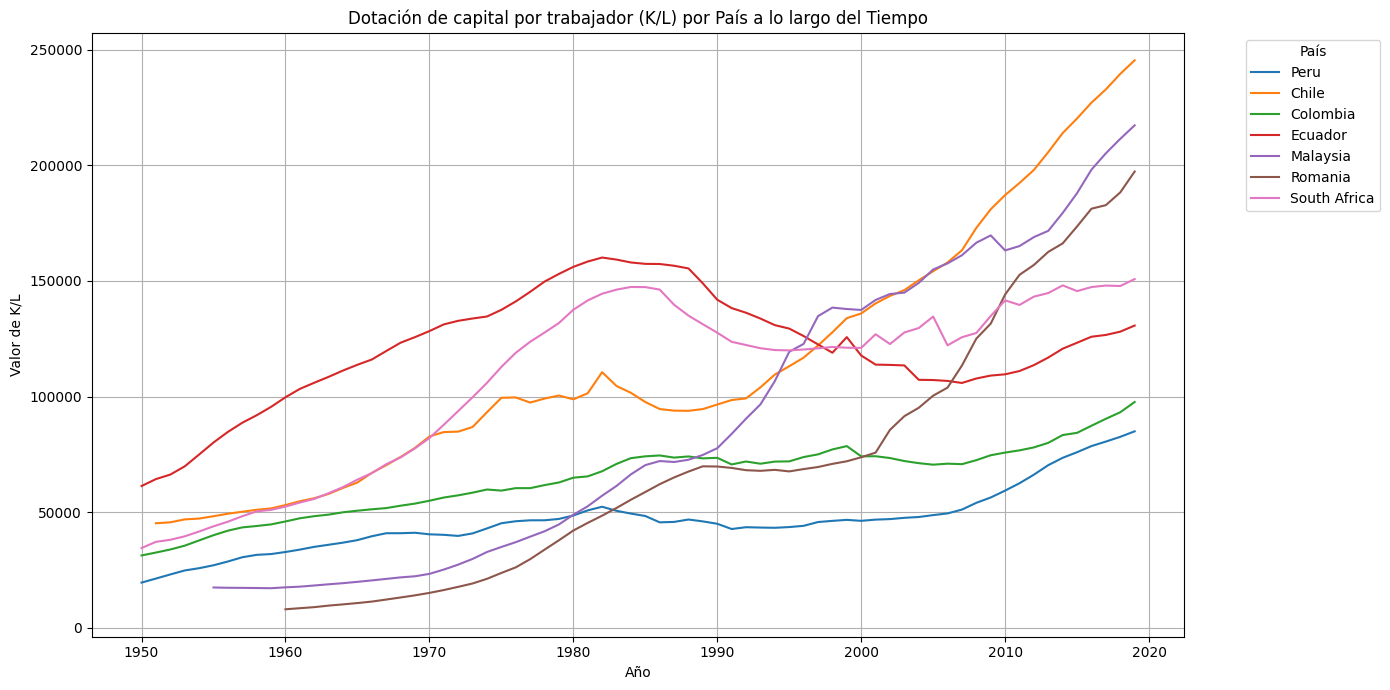

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas relevantes
plot_data_K_over_L = df[['year', 'country', 'K_over_L']]

# Eliminar filas con valores nulos en la columna 'K_over_L' para asegurar una visualización limpia
plot_data_K_over_L = plot_data_K_over_L.dropna(subset=['K_over_L'])

# Crear el gráfico de serie de tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=plot_data_K_over_L, x='year', y='K_over_L', hue='country')

plt.title('Dotación de capital por trabajador (K/L) por País a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Valor de K/L')
plt.grid(True)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Tendencia General de Perú:

Perú comienza con una dotación de capital por trabajador relativamente baja en los años 50, en el grupo de los países con menor K/L.
Muestra un crecimiento constante y gradual a lo largo de las décadas, aunque con algunas mesetas y desaceleraciones.
Hacia 2020, la dotación de capital por trabajador de Perú ha aumentado significativamente, acercándose a los 90,000 unidades (posiblemente dólares o alguna unidad indexada), superando a Ecuador y Colombia en el período final.
Pares Estructurales (Colombia, Ecuador, Sudáfrica):

### Ecuador y Colombia:
Ambos países comienzan con K/L bajos y muestran un crecimiento constante, pero su ritmo es más lento que el de algunos pares aspiracionales. Colombia termina ligeramente por debajo de Perú, mientras que Ecuador se encuentra en un nivel similar o un poco más bajo que Colombia al final del período.
Sudáfrica: Inicialmente, Sudáfrica tenía una dotación de capital por trabajador relativamente alta en los años 50. Experimentó un crecimiento hasta los años 80, luego una caída significativa, y una recuperación sostenida a partir de finales de los 90, terminando en un nivel alto, superando a la mayoría de los países estructurales y acercándose a los aspiracionales.
Pares Aspiracionales (Chile, Malasia, Rumanía):

### Chile:
Inicia con un K/L moderado y muestra un crecimiento muy robusto y sostenido, especialmente a partir de los años 80. Termina el período (2020) con la dotación de capital por trabajador más alta del grupo, superando las 240,000 unidades. Esto sugiere una fuerte inversión en capital y tecnología por trabajador.
### Malasia:
Muestra un patrón de crecimiento impresionante, partiendo de un K/L relativamente bajo en los años 50 y experimentando un ascenso muy rápido y constante hasta aproximadamente 1990, superando incluso a Chile en algunos períodos. Después de una leve caída, retoma el crecimiento y termina el período en un nivel muy alto, solo superado por Chile.
### Rumanía:
Destaca por tener una dotación de K/L muy alta en las primeras décadas, superando a todos los demás países hasta finales de los 80, probablemente debido a las políticas de industrialización intensiva en capital de la era comunista. Sin embargo, a partir de los años 90, experimenta un estancamiento o un crecimiento más lento, siendo superada por Chile y Malasia, pero aún manteniendo un nivel alto hacia 2020.

### Conclusiones Generales:

Divergencia entre Grupos: El gráfico ilustra claramente por qué Chile y Malasia son considerados "aspiracionales". Ambos países han logrado acumular una cantidad significativamente mayor de capital por trabajador en comparación con Perú y sus pares estructurales (Colombia, Ecuador). Esta mayor intensidad de capital es un factor clave en su mayor productividad y desarrollo económico.
Trayectorias de Desarrollo: Las trayectorias reflejan diferentes modelos de desarrollo. Países como Chile y Malasia han invertido consistentemente en aumentar su capital por trabajador, lo que se traduce en economías más avanzadas. Rumanía muestra un caso interesante de una alta inversión inicial que no siempre se tradujo en una eficiencia sostenida como la de los otros aspiracionales después de un cambio de modelo económico.

Desafío para Perú: Aunque Perú ha mejorado su dotación de capital por trabajador, el gráfico subraya el desafío de cerrar la brecha con los países aspiracionales que tienen niveles de K/L considerablemente más altos. Aumentar la inversión en capital por trabajador es fundamental para mejorar la productividad y el crecimiento económico a largo plazo.
En síntesis, el gráfico de la Dotación de Capital por Trabajador (K/L) subraya las diferencias estructurales en las economías y proporciona una justificación visual del porqué ciertos países son considerados "aspiracionales" para Perú en términos de su capacidad de inversión y acumulación de capital.

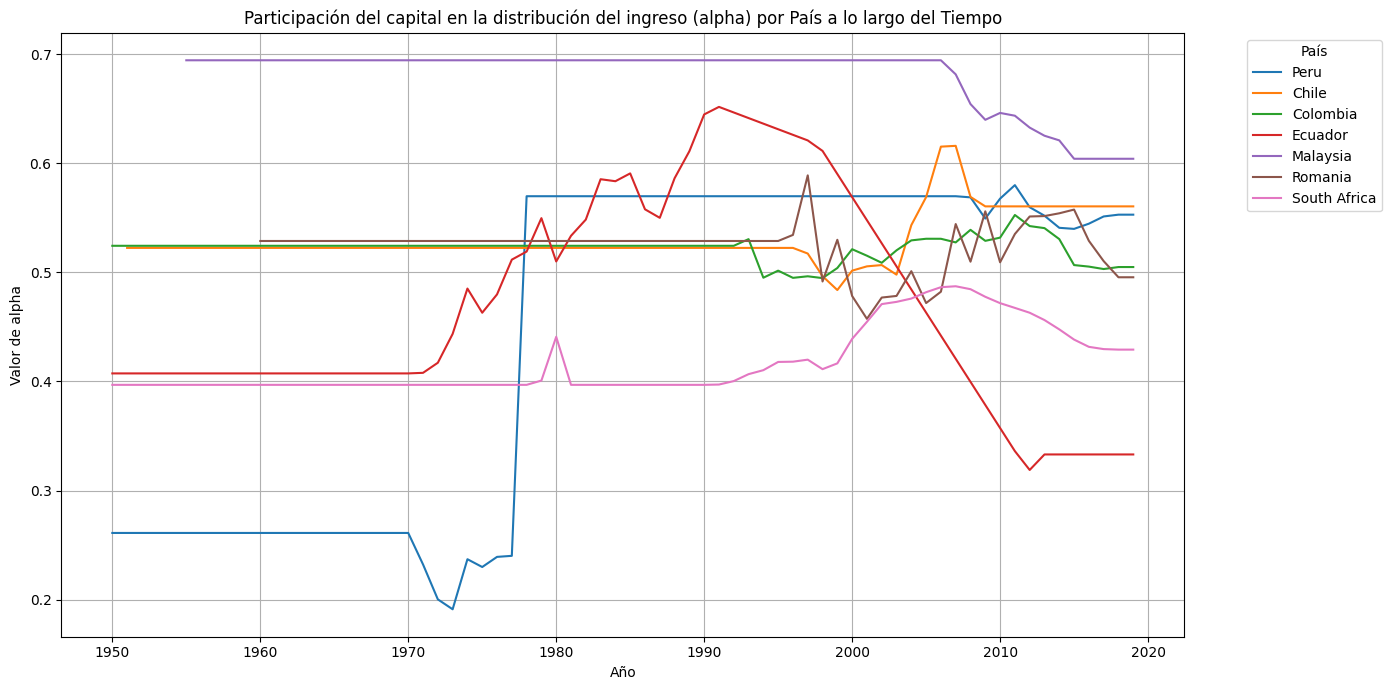

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas relevantes
plot_data_alpha = df[['year', 'country', 'alpha']]

# Eliminar filas con valores nulos en la columna 'K_over_L' para asegurar una visualización limpia
plot_data_alpha = plot_data_alpha.dropna(subset=['alpha'])

# Crear el gráfico de serie de tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=plot_data_alpha, x='year', y='alpha', hue='country')

plt.title('Participación del capital en la distribución del ingreso (alpha) por País a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Valor de alpha')
plt.grid(True)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Tendencia General de Perú:

Perú comienza con una participación del capital relativamente baja (alrededor de 0.25) en los años 50 y 60.
Experimenta una caída notable alrededor de 1970 (cercana a 0.20), seguida de un brusco aumento a finales de los 70, estabilizándose en un nivel más alto (alrededor de 0.57-0.58) a partir de los 80 y manteniéndose relativamente constante hasta 2020.
Este salto sugiere cambios estructurales significativos en la economía peruana, posiblemente relacionados con políticas económicas o reformas que favorecieron la acumulación de capital o la distribución del ingreso hacia los propietarios del capital.

### Pares Estructurales (Colombia, Ecuador, Sudáfrica):

- Ecuador: Muestra una trayectoria particular. Comienza con una participación del capital baja (alrededor de 0.40) y tiene un aumento significativo a partir de los años 80, alcanzando un pico de más de 0.65 a finales de los 80 y principios de los 90. Luego experimenta una fuerte caída, terminando en un nivel mucho más bajo (alrededor de 0.33) en 2020. Esto podría reflejar periodos de alta rentabilidad del capital seguidos de crisis o cambios de política.
- Colombia: Su participación del capital se mantiene relativamente estable alrededor de 0.52-0.53 durante la mayor parte del período, con algunas fluctuaciones menores.
- Sudáfrica: Muestra una participación del capital notablemente alta al principio (cercana a 0.70) y la mantiene en ese nivel hasta finales de los 2000, con una ligera caída hacia 0.60 al final del período. Esto indica una economía donde el capital ha recibido históricamente una proporción muy grande del ingreso.

### Pares Aspiracionales (Chile, Malasia, Rumanía):

- Chile: Comienza con una participación del capital alrededor de 0.52 y muestra una trayectoria relativamente estable en comparación con otros países, con un ligero aumento en los últimos años, terminando alrededor de 0.55.
- Malasia: Muestra una tendencia estable alrededor de 0.52-0.53, similar a Colombia y Chile, lo que sugiere una distribución relativamente constante entre capital y trabajo.
- Rumanía: Su participación del capital es muy constante en un nivel elevado (cercano a 0.70) hasta finales de los 2000, similar a Sudáfrica, lo que sugiere una fuerte orientación hacia el capital. Luego experimenta una caída hacia 0.60, aunque sigue siendo alta. Esto puede estar relacionado con su pasado socialista y la posterior transición económica.

### Conclusiones Generales:

- Heterogeneidad en la Distribución: El gráfico revela una gran heterogeneidad en la participación del capital en la distribución del ingreso entre los países, lo que refleja diferencias en sus estructuras económicas, políticas laborales, políticas fiscales, y el peso relativo de diferentes sectores (intensivos en capital vs. intensivos en trabajo).
- Perú: Un Cambio Estructural: El caso de Perú es notable por el brusco aumento en la participación del capital a finales de los 70 y su posterior estabilización en un nivel más alto, lo que sugiere un cambio fundamental en cómo se distribuye el ingreso entre capital y trabajo en su economía.
- Pares Aspiracionales y Estructurales en Alpha: No hay una tendencia clara que distinga a los "pares aspiracionales" de los "estructurales" basándose únicamente en el valor de "alpha". Algunos aspiracionales (Malasia, Chile) tienen un "alpha" similar a algunos estructurales (Colombia), mientras que otros aspiracionales (Rumanía) y estructurales (Sudáfrica) tienen alphas históricamente muy altos. Esto sugiere que el Banco Mundial considera otros factores (como el PIB per cápita, PTF, K/L) más relevantes para la categorización de aspiracionalidad que la mera participación del capital en el ingreso, o que la "deseabilidad" de un cierto "alpha" depende del contexto económico y social.
- Dinámicas Recientes: Hacia 2020, la mayoría de los países se encuentran en un rango de participación del capital entre 0.50 y 0.60, con algunas excepciones como Ecuador (más bajo) y Sudáfrica/Rumanía (todavía altos).

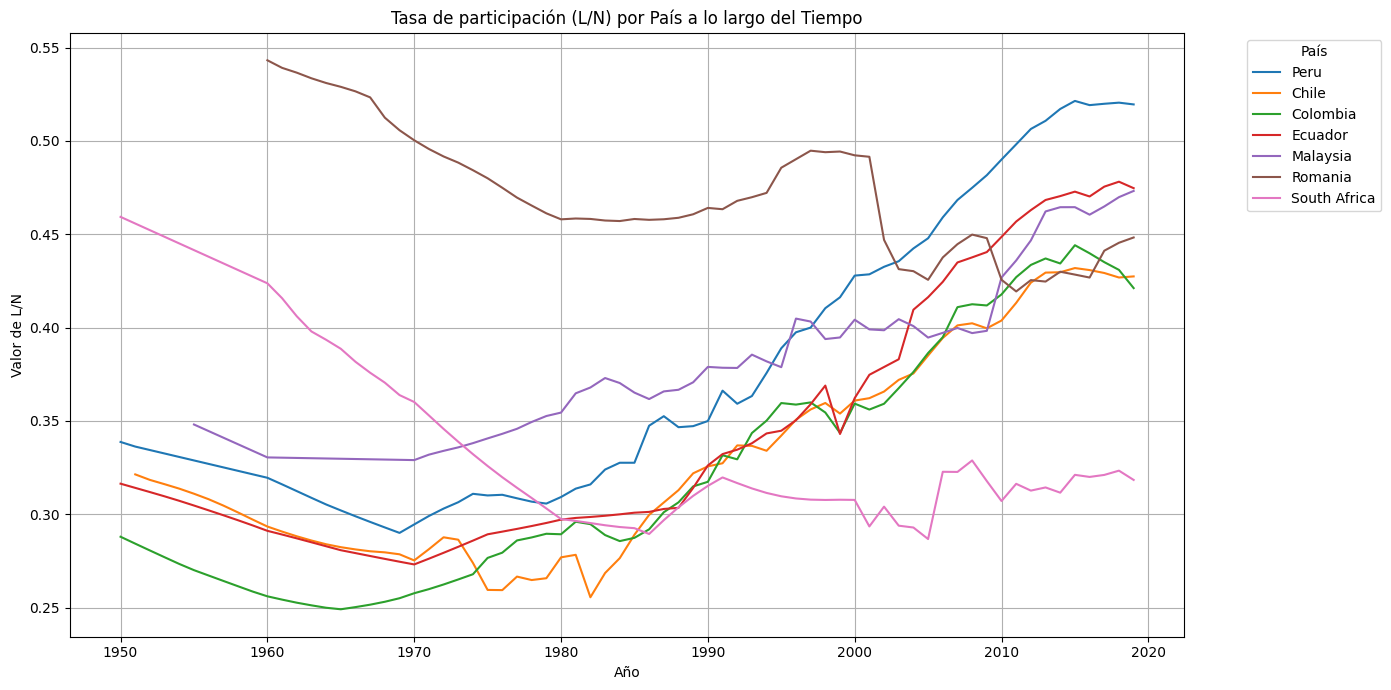

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas relevantes
plot_data_L_over_N = df[['year', 'country', 'L_over_N']]

# Eliminar filas con valores nulos en la columna 'L_over_N' para asegurar una visualización limpia
plot_data_L_over_N = plot_data_L_over_N.dropna(subset=['L_over_N'])

# Crear el gráfico de serie de tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=plot_data_L_over_N, x='year', y='L_over_N', hue='country')

plt.title('Tasa de participación (L/N) por País a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Valor de L/N')
plt.grid(True)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Tendencia General de Perú:

Perú comienza con una tasa de participación de aproximadamente 0.33 en 1950.
Experimenta un ligero descenso hasta finales de los 60 (alrededor de 0.29), seguido de un crecimiento constante y significativo.
A partir de los años 80, la tasa de L/N de Perú muestra un crecimiento acelerado, superando a la mayoría de los otros países y alcanzando el nivel más alto del grupo, cerca de 0.52 en 2020. Esto sugiere una creciente incorporación de la población a la fuerza laboral a lo largo del tiempo.

### Pares Estructurales (Colombia, Ecuador, Sudáfrica):

- Ecuador y Colombia: Ambos países muestran tendencias similares a Perú, con un ligero descenso inicial seguido de un crecimiento constante desde los años 70 u 80. Sus tasas de participación terminan alrededor de 0.40-0.45 en 2020, por debajo de Perú.
- Sudáfrica: Presenta una trayectoria muy diferente. Comienza con una tasa de participación muy alta (cercana a 0.54) en 1950 y experimenta un descenso gradual pero significativo hasta los 70 (alrededor de 0.46). Luego muestra una recuperación, pero su tasa finaliza en 2020 alrededor de 0.47, por debajo de Perú, Chile y Malasia.

### Pares Aspiracionales (Chile, Malasia, Rumanía):

- Chile: Inicia con una tasa de L/N similar a Perú (alrededor de 0.32) y sigue una trayectoria de crecimiento constante, aunque más lento que Perú en las últimas décadas. Termina el período alrededor de 0.43 en 2020.
- Malasia: Muestra un patrón de crecimiento muy robusto y constante desde un nivel bajo (alrededor de 0.33) en 1960. Su tasa supera a la mayoría de los países y termina en un nivel alto, cercano a 0.48 en 2020, posicionándose como uno de los líderes junto a Perú.
- Rumanía: Exhibe una tasa de participación consistentemente baja en comparación con el resto del grupo, fluctuando principalmente entre 0.30 y 0.35. Después de un ligero descenso en los años 90, se mantiene relativamente estable. Esto podría reflejar diferentes estructuras demográficas o políticas laborales.

### Conclusiones Generales:

- Aumento Generalizado: La mayoría de los países, con la notable excepción de Rumanía, muestran una tendencia general al aumento de la tasa de participación a lo largo del tiempo, especialmente a partir de los años 70 y 80. Esto podría deberse a factores como la incorporación de más mujeres al mercado laboral, cambios demográficos o mejoras en las oportunidades de empleo.
- Liderazgo de Perú y Malasia: Perú y Malasia destacan por haber logrado las tasas de participación más altas al final del período. Esto sugiere que han sido exitosos en movilizar una mayor proporción de su población para participar en la fuerza laboral.
- Diversidad en las Tendencias: A pesar de la tendencia general al alza, hay una diversidad considerable en las trayectorias. Sudáfrica muestra una caída inicial, mientras que Rumanía mantiene un nivel bajo y relativamente plano. Estas diferencias pueden estar influenciadas por factores sociodemográficos, culturales y económicos específicos de cada país.
- Implicaciones para el Crecimiento: Una mayor tasa de participación de la fuerza laboral, junto con la acumulación de capital (K/L) y la Productividad Total de Factores (PTF), son componentes esenciales del crecimiento económico. El fuerte aumento en L/N de Perú es un factor positivo para su crecimiento potencial.

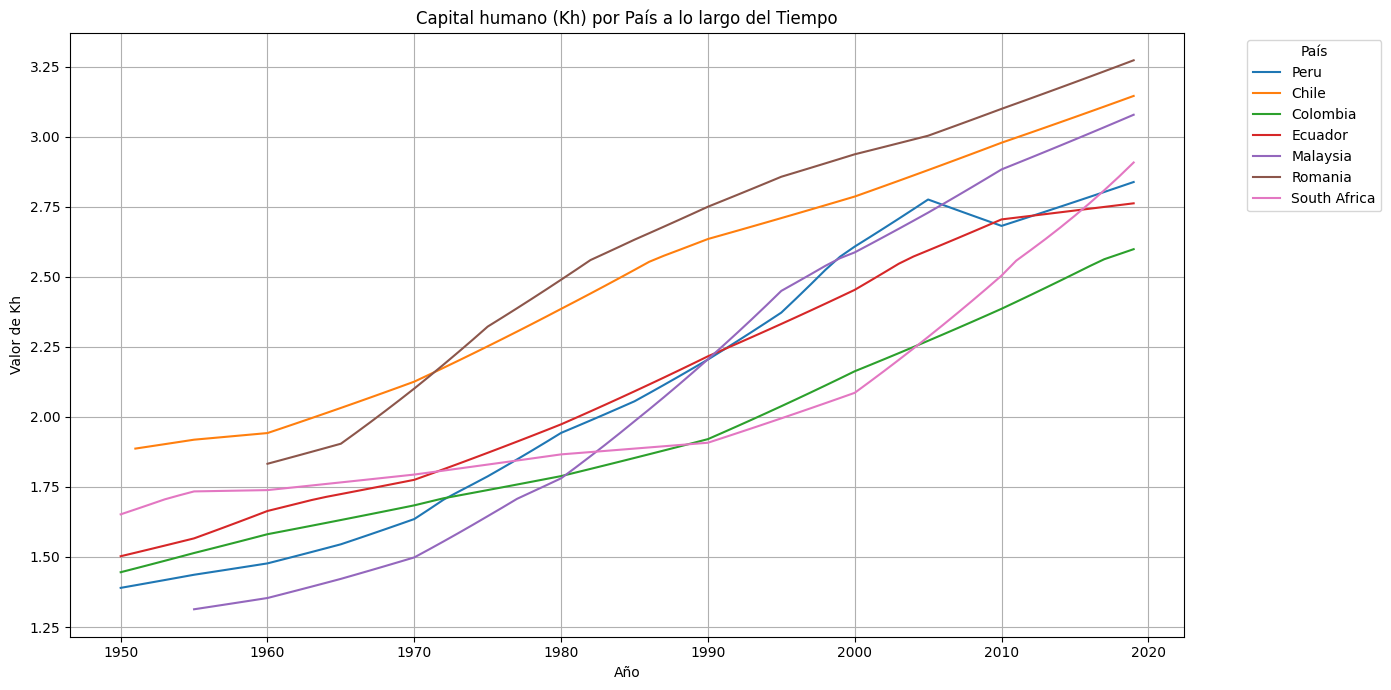

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas relevantes
plot_data_Kh = df[['year', 'country', 'Kh']]

# Eliminar filas con valores nulos en la columna 'Kh' para asegurar una visualización limpia
plot_data_Kh = plot_data_Kh.dropna(subset=['Kh'])

# Crear el gráfico de serie de tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=plot_data_Kh, x='year', y='Kh', hue='country')

plt.title('Capital humano (Kh) por País a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Valor de Kh')
plt.grid(True)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Tendencia General de Perú:

Perú comienza con un nivel de capital humano relativamente bajo (alrededor de 1.35) en 1950, siendo uno de los países con menor Kh al inicio del período.
Muestra un crecimiento constante y sostenido a lo largo de las décadas.
Hacia 2020, el capital humano de Perú ha aumentado significativamente, alcanzando un valor cercano a 2.8, lo que indica una mejora considerable en la calidad de su fuerza laboral. Se encuentra en un rango intermedio en comparación con los otros países al final del período.

### Pares Estructurales (Colombia, Ecuador, Sudáfrica):

- Ecuador y Colombia: Ambos países muestran un crecimiento constante del capital humano. Colombia comienza en un nivel similar a Perú y sigue una trayectoria de crecimiento sostenido, terminando alrededor de 2.6 en 2020. Ecuador también muestra un crecimiento gradual y termina en un nivel similar a Colombia.
- Sudáfrica: Inicia con un nivel de capital humano ligeramente más alto que Perú en 1950 (alrededor de 1.65) y experimenta un crecimiento constante, terminando alrededor de 2.9 en 2020.

### Pares Aspiracionales (Chile, Malasia, Rumanía):

- Chile: Es el país con el nivel de capital humano más alto desde el inicio del período (cercano a 1.90 en 1950). Muestra un crecimiento constante y sólido a lo largo de todo el tiempo, terminando con el valor más alto del grupo, superando 3.1 en 2020. Esto subraya su posición como líder en desarrollo de capital humano.
- Malasia: Comienza con un capital humano bajo (similar a Perú en los años 50) pero experimenta un crecimiento muy acelerado y sostenido a partir de los años 70 y 80. Su trayectoria ascendente es muy pronunciada, superando a varios países y terminando en un nivel alto, cercano a 3.1 en 2020, casi al mismo nivel que Chile.
- Rumanía: También muestra un capital humano relativamente alto en las primeras décadas, similar a Chile, y un crecimiento constante. Aunque es superada por Chile y Malasia en los últimos años, su valor final (cercano a 2.8) la posiciona bien, similar a Perú o ligeramente por encima.

### Conclusiones Generales:

- Crecimiento General del Capital Humano: Todos los países analizados, sin excepción, muestran una tendencia al aumento de su capital humano a lo largo de las décadas. Esto refleja los esfuerzos globales en educación, salud y desarrollo de habilidades.
- Brechas en el Nivel de Capital Humano: A pesar del crecimiento general, existen diferencias notables en los niveles absolutos de capital humano. Chile y Malasia son líderes claros en este indicador, lo que justifica su clasificación como "aspiracionales". Su capacidad para desarrollar y utilizar eficazmente su capital humano es un motor clave de su desarrollo.
- Perú: Mejora Sostenida: Perú ha logrado una mejora significativa en su capital humano, aunque aún se encuentra en un nivel intermedio en comparación con los líderes del grupo. Continuar invirtiendo en educación, salud y formación profesional será crucial para que Perú cierre la brecha con los países más avanzados.
- Importancia del Capital Humano para el Desarrollo: El gráfico refuerza la idea de que el desarrollo del capital humano es un pilar fundamental para el progreso económico. Los países que han invertido más y de manera más efectiva en su gente tienden a mostrar niveles de productividad y bienestar más altos.

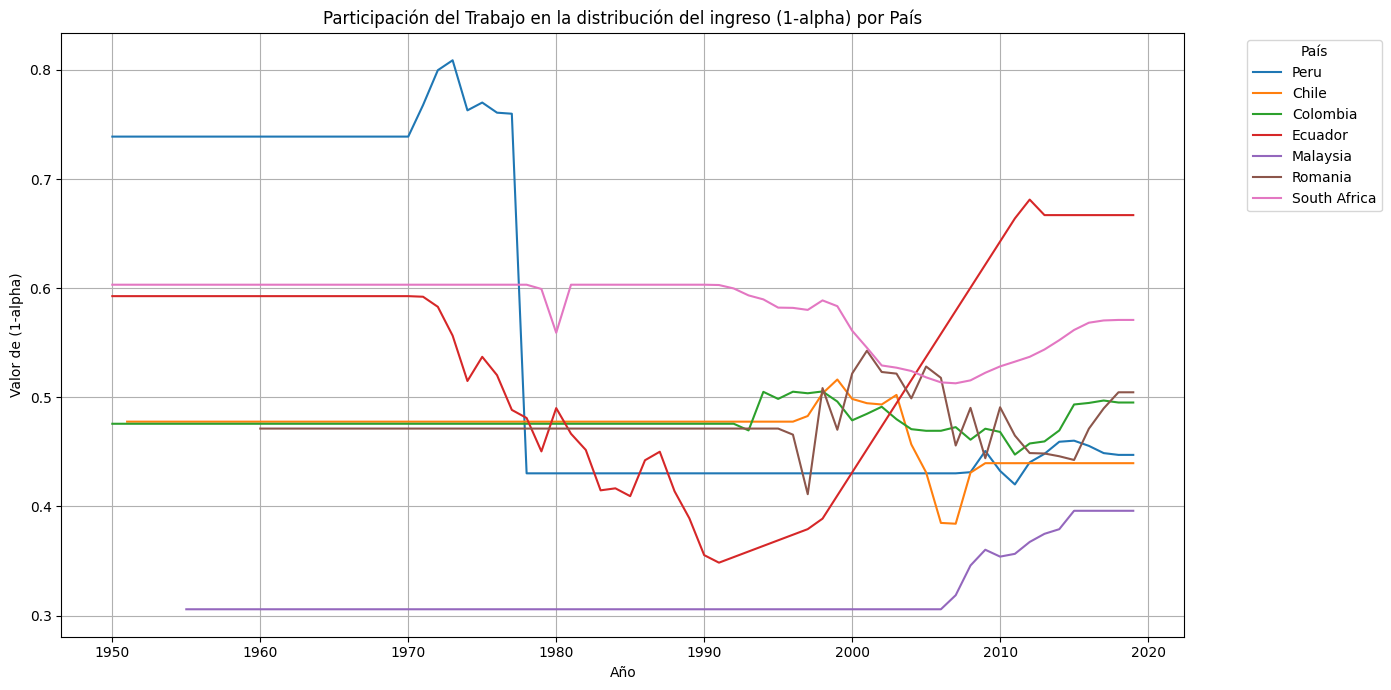

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas relevantes
plot_data_beta = df[['year', 'country', '1-alpha']]

# Eliminar filas con valores nulos en la columna '1-alpha' para asegurar una visualización limpia
plot_data_beta = plot_data_beta.dropna(subset=['1-alpha'])

# Crear el gráfico de serie de tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=plot_data_beta, x='year', y='1-alpha', hue='country')

plt.title('Participación del Trabajo en la distribución del ingreso (1-alpha) por País')
plt.xlabel('Año')
plt.ylabel('Valor de (1-alpha)')
plt.grid(True)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Tendencia General de Perú:

Perú comienza con una participación del trabajo muy alta (cercana a 0.74) en los años 50 y 60, lo que indica que el trabajo recibía una parte considerable del ingreso.
A principios de los años 70, experimenta un fuerte y abrupto descenso en la participación del trabajo, cayendo a aproximadamente 0.43-0.45, y se mantiene en ese nivel hasta el final del período.
Este cambio drástico en los años 70 sugiere un cambio estructural importante en la economía peruana, donde la proporción del ingreso destinada al trabajo disminuyó significativamente, quizás debido a cambios en políticas laborales, liberalización económica o transformaciones en la estructura productiva.

### Pares Estructurales (Colombia, Ecuador, Sudáfrica):

- Ecuador: Muestra una trayectoria inusual. Comienza con una participación del trabajo baja (alrededor de 0.40), experimenta un descenso aún mayor a mediados de los 90 (hasta aproximadamente 0.35), y luego un fuerte aumento a partir de los 2000, terminando en un nivel alto (alrededor de 0.67) en 2020. Esto sugiere periodos de desvalorización del trabajo seguidos de políticas de redistribución o fortalecimiento laboral.
- Colombia: Su participación del trabajo se mantiene relativamente estable alrededor de 0.47-0.48 durante la mayor parte del período, con algunas fluctuaciones menores, similar a la tendencia de Chile y Malasia.
- Sudáfrica: Inicia con una participación del trabajo relativamente baja (alrededor de 0.30) y se mantiene en este nivel hasta finales de los 2000, para luego mostrar un ligero aumento hacia 0.32 en 2020. Esto indica que el capital ha tenido históricamente una porción muy grande del ingreso en Sudáfrica.

### Pares Aspiracionales (Chile, Malasia, Rumanía):

- Chile: Su participación del trabajo se mantiene relativamente estable en el rango de 0.47-0.48 durante la mayor parte del período, con algunas fluctuaciones.
- Malasia: Similar a Chile y Colombia, su participación del trabajo se mantiene alrededor de 0.47-0.48.
- Rumanía: Exhibe una participación del trabajo muy baja (cercana a 0.30) en las primeras décadas, similar a Sudáfrica, lo que podría estar relacionado con su pasado socialista y la priorización de la inversión de capital estatal. Sin embargo, a partir de los 2000, muestra un aumento notable, terminando alrededor de 0.57 en 2020.

### Conclusiones Generales:

- Divergencia en la Distribución del Ingreso: El gráfico revela una gran diversidad en cómo el ingreso nacional se distribuye entre trabajo y capital en estos países. Las trayectorias reflejan diferentes modelos económicos, políticas laborales y estructuras productivas.
- Perú: Un Cambio Abrupto: El caso de Perú es llamativo por el drástico descenso en la participación del trabajo en los años 70. Este cambio sugiere un punto de inflexión significativo en la política económica o en la estructura laboral del país.
- Contraste con Ecuador y Rumanía: Interesantemente, mientras que Perú tuvo una caída en la participación del trabajo y luego se estabilizó, Ecuador y Rumanía (que también iniciaron con niveles bajos o experimentaron descensos) mostraron aumentos significativos en la participación del trabajo en las últimas décadas, sugiriendo reformas o cambios que favorecieron a los trabajadores.
- Estabilidad en Algunos Casos: Países como Chile, Colombia y Malasia muestran una participación del trabajo relativamente más estable y en un rango intermedio (alrededor de 0.47-0.48) a lo largo del tiempo.
- Implicaciones para la Desigualdad: La participación del trabajo en el ingreso es un componente crucial para entender la desigualdad. Una menor participación del trabajo puede implicar una mayor concentración de ingresos en el capital, lo que podría contribuir a la desigualdad de ingresos en la población en general.

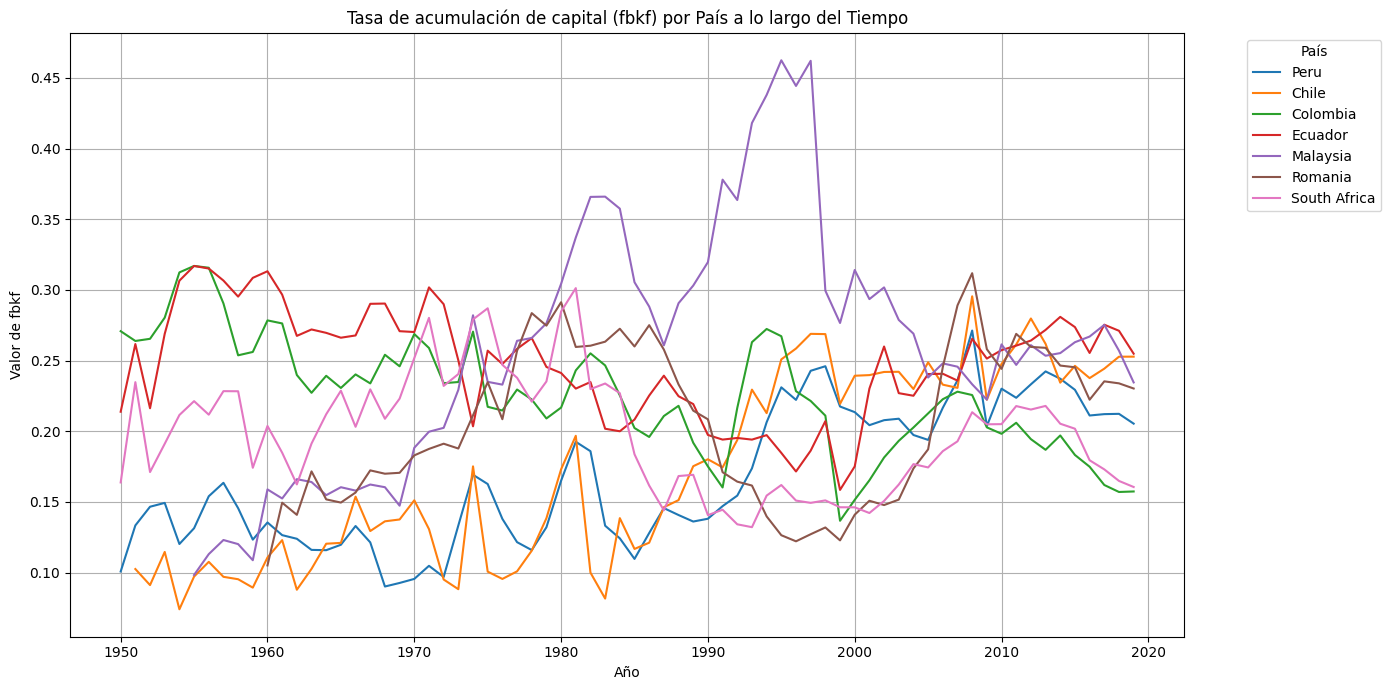

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas relevantes
plot_data_fbkf = df[['year', 'country', 'fbkf']]

# Eliminar filas con valores nulos en la columna 'fbkf' para asegurar una visualización limpia
plot_data_fbkf = plot_data_fbkf.dropna(subset=['fbkf'])

# Crear el gráfico de serie de tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=plot_data_fbkf, x='year', y='fbkf', hue='country')

plt.title('Tasa de acumulación de capital (fbkf) por País a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Valor de fbkf')
plt.grid(True)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Tendencia General de Perú:

Perú comienza con una tasa de acumulación de capital relativamente baja (alrededor de 0.15) en los años 50.
Su trayectoria es bastante volátil, con fluctuaciones. Muestra un descenso en los años 60, un repunte a mediados de los 70, y una caída notable en los 80.
A partir de los años 90, la tasa de acumulación de capital de Perú muestra una recuperación y se estabiliza en un rango de 0.20-0.25 en los últimos años, aunque con altibajos.
### Pares Estructurales (Colombia, Ecuador, Sudáfrica):

- Ecuador: Exhibe una tasa de acumulación de capital relativamente alta en los años 50 y 60 (cercana a 0.27-0.30), luego experimenta una caída en los 80, pero se recupera y mantiene un nivel similar a Perú en los últimos años.
- Colombia: Su tasa de acumulación de capital es más estable y se mantiene en un rango similar al de Perú, fluctuando alrededor de 0.20-0.25 en las últimas décadas.
- Sudáfrica: Comienza con una tasa de acumulación de capital considerablemente alta (cercana a 0.26) en los años 50, experimenta un descenso significativo a finales de los 80 y principios de los 90, y luego una leve recuperación, terminando en un nivel más bajo (alrededor de 0.15) en 2020, siendo una de las tasas más bajas del grupo.

### Pares Aspiracionales (Chile, Malasia, Rumanía):

- Chile: Muestra una tasa de acumulación de capital fluctuante, pero con una tendencia general al alza a partir de los 80. Alcanza picos cercanos a 0.28-0.30 en las últimas décadas, lo que sugiere una fuerte inversión.
- Malasia: Se destaca por tener la tasa de acumulación de capital más alta y consistente del grupo durante gran parte del período. Alcanza picos muy elevados (cercanos a 0.45) en los años 90, lo que indica un fuerte impulso de inversión. Aunque experimenta una caída posterior, sigue manteniendo una tasa relativamente alta en los últimos años, lo que explica su rápido desarrollo.
- Rumanía: También muestra una tasa de acumulación de capital relativamente alta en las primeras décadas (cercana a 0.25-0.30), luego experimenta fluctuaciones y se estabiliza en un nivel intermedio en los últimos años.

### Conclusiones Generales:

- Malasia como líder en Inversión: El gráfico resalta claramente a Malasia como el país con la mayor y más sostenida tasa de acumulación de capital durante la mayor parte del período analizado, lo que es un factor clave en su rápido crecimiento y desarrollo económico.
- Volatilidad en Perú: La tasa de acumulación de capital de Perú ha sido más volátil en comparación con otros países, lo que puede reflejar períodos de inestabilidad económica o política que afectaron la inversión.
- Importancia de la Inversión: La acumulación de capital (inversión) es fundamental para el crecimiento económico a largo plazo, ya que aumenta la capacidad productiva de una economía. Los países con tasas de inversión más altas tienden a tener un crecimiento del PIB y del PIB per cápita más rápido, como se ve en el caso de Malasia y, en menor medida, Chile.
- Diferencias entre Pares: Si bien todos los países invierten, la magnitud y consistencia de esa inversión varían. Los "pares aspiracionales" como Malasia (y Chile en las últimas décadas) demuestran una mayor capacidad para movilizar y asignar recursos a la inversión en capital productivo.

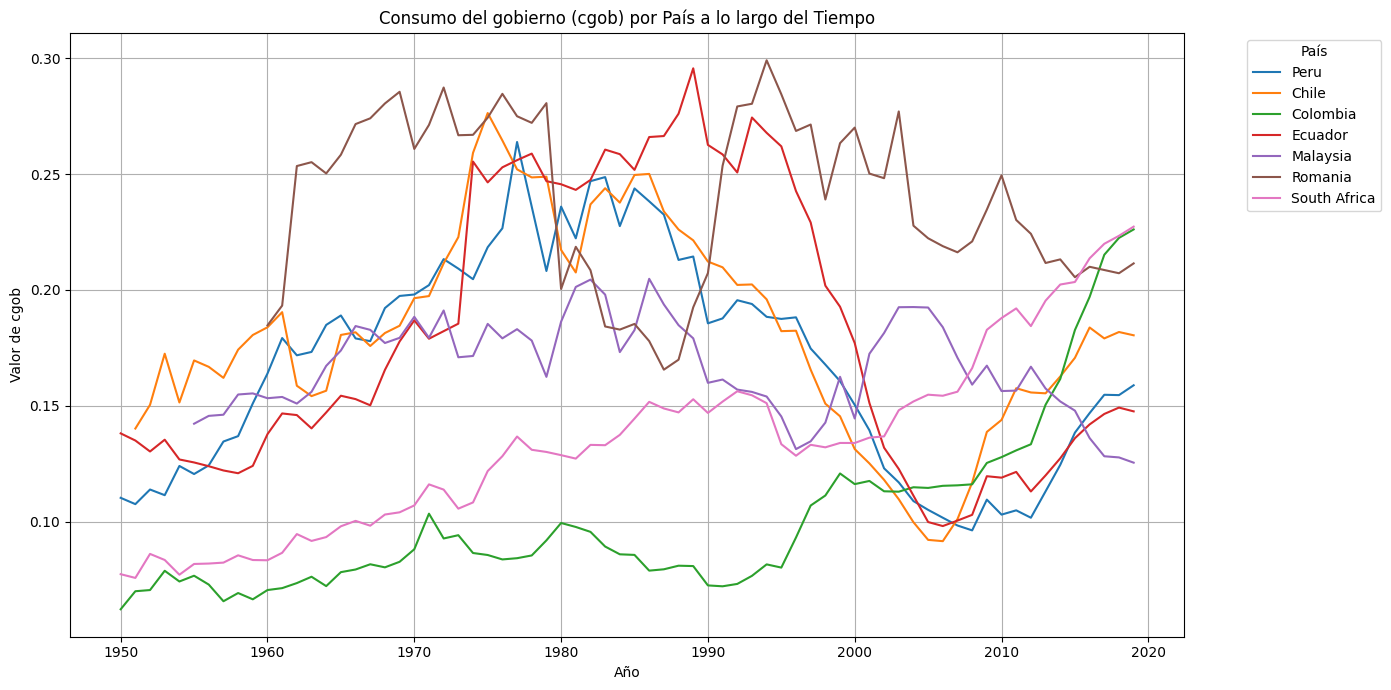

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas relevantes
plot_data_cgob = df[['year', 'country', 'cgob']]

# Eliminar filas con valores nulos en la columna 'cgob' para asegurar una visualización limpia
plot_data_cgob = plot_data_cgob.dropna(subset=['cgob'])

# Crear el gráfico de serie de tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=plot_data_cgob, x='year', y='cgob', hue='country')

plt.title('Consumo del gobierno (cgob) por País a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Valor de cgob')
plt.grid(True)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Tendencia General de Perú:

Perú comienza con un nivel relativamente bajo de consumo del gobierno (alrededor de 0.11) en los años 50.
Muestra una tendencia ascendente, alcanzando un pico de casi 0.27 a mediados de los 70.

Experimenta un descenso significativo en los años 80 y 90, estabilizándose en un nivel más bajo (alrededor de 0.15-0.16) en los últimos años, lo que sugiere una contracción del gasto de consumo gubernamental en relación con el PIB.

### Pares Estructurales (Colombia, Ecuador, Sudáfrica):

- Ecuador: Inicia con un consumo del gobierno relativamente alto (alrededor de 0.13) y muestra una tendencia de aumento, con picos cercanos a 0.27-0.28 en los 80 y 90. Luego experimenta un descenso y se recupera ligeramente, terminando en un nivel cercano a Perú (aproximadamente 0.16).
- Colombia: Es notable por tener el consumo del gobierno más bajo del grupo en la mayor parte del período (entre 0.06 y 0.12), lo que indica un sector público relativamente pequeño en términos de gasto de consumo. Hacia 2020, muestra un ligero aumento, pero sigue siendo uno de los más bajos.
- Sudáfrica: Presenta una de las tasas de consumo del gobierno más altas y consistentes, oscilando generalmente entre 0.20 y 0.30 durante la mayor parte del período. Hacia 2020, su consumo del gobierno se mantiene en un nivel alto (alrededor de 0.23).

### Pares Aspiracionales (Chile, Malasia, Rumanía):

- Chile: Comienza con un consumo del gobierno moderado (alrededor de 0.14) y muestra una tendencia a la baja hasta los 90, recuperándose y terminando alrededor de 0.18-0.19 en 2020, un nivel intermedio.
- Malasia: Inicia con un consumo del gobierno bajo (cercano a 0.08) y muestra una tendencia ascendente, superando a varios países y terminando en un nivel relativamente alto (alrededor de 0.22) en 2020. Esto puede reflejar un papel creciente del gobierno en la provisión de bienes y servicios.
- Rumanía: También comienza con un consumo del gobierno bajo (cercano a 0.08) y muestra un patrón más fluctuante con picos y valles, terminando en un nivel intermedio (alrededor de 0.13) en 2020, similar a los niveles más bajos del grupo en los últimos años.

### Conclusiones Generales:

- Diversidad en el Tamaño del Estado: El gráfico muestra una gran diversidad en el tamaño del sector público (medido por el consumo del gobierno) entre los países. Sudáfrica consistentemente tiene un sector público más grande, mientras que Colombia y Rumanía lo tienen más pequeño.
- Perú: Contracción del Gasto Público: La trayectoria de Perú sugiere un período de expansión del gasto público en los años 70, seguido por una contracción significativa en las décadas siguientes, lo que podría estar relacionado con reformas estructurales, ajuste fiscal o cambios en el modelo de desarrollo.
- Malasia: Gobierno Creciente: Malasia es un caso interesante, ya que a pesar de ser un "par aspiracional" con un fuerte crecimiento económico, su consumo del gobierno ha mostrado una tendencia creciente, lo que sugiere que el estado ha jugado un papel activo en su desarrollo.
- No hay un "Óptimo" Claro: El gráfico no sugiere que un nivel de consumo del gobierno más alto o más bajo se correlacione directamente con ser un par estructural o aspiracional. Países aspiracionales como Chile y Rumanía tienen niveles intermedios o bajos de consumo gubernamental, mientras que Malasia lo tiene en aumento. Esto indica que la eficiencia y la calidad del gasto son más importantes que el mero tamaño.

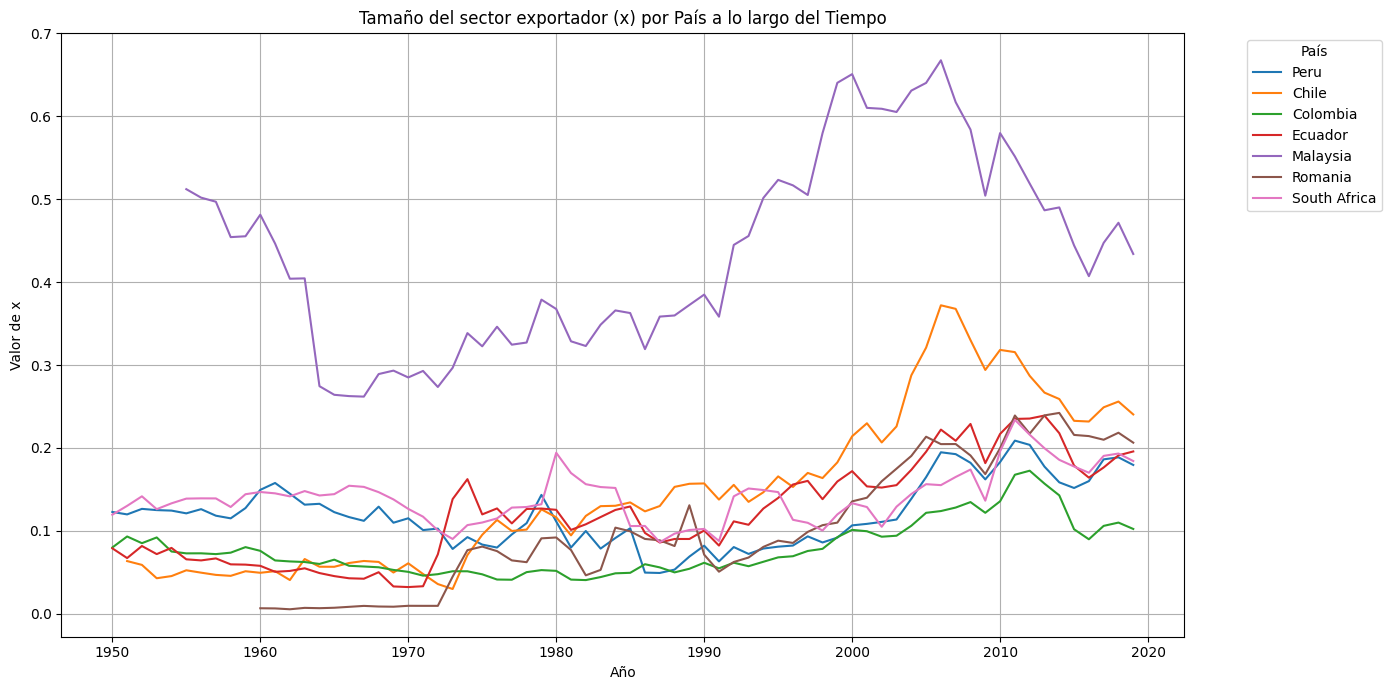

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas relevantes
plot_data_x = df[['year', 'country', 'x']]

# Eliminar filas con valores nulos en la columna 'x' para asegurar una visualización limpia
plot_data_x = plot_data_x.dropna(subset=['x'])

# Crear el gráfico de serie de tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=plot_data_x, x='year', y='x', hue='country')

plt.title('Tamaño del sector exportador (x) por País a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Valor de x')
plt.grid(True)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Tendencia General de Perú:

Perú comienza con un tamaño del sector exportador relativamente alto (alrededor de 0.13) en 1950.
Muestra una tendencia decreciente hasta los años 70, con un valor cercano a 0.10.

A partir de los 80, el sector exportador de Perú experimenta un crecimiento gradual y sostenido, alcanzando un valor cercano a 0.20 en 2020. Esto sugiere una creciente apertura y dependencia de las exportaciones en las últimas décadas.

### Pares Estructurales (Colombia, Ecuador, Sudáfrica):

- Ecuador: Inicia con un tamaño del sector exportador bajo (cercano a 0.08) y muestra un crecimiento más pronunciado que Perú, alcanzando picos cercanos a 0.20 y 0.25 en diferentes períodos. Hacia 2020, su valor es similar al de Perú.
- Colombia: Es notable por tener el tamaño del sector exportador más bajo del grupo durante la mayor parte del período (generalmente entre 0.05 y 0.12). Sin embargo, muestra un crecimiento considerable a partir de los 2000, terminando alrededor de 0.10 en 2020, aunque sigue siendo uno de los menos abiertos al comercio internacional en este grupo.
- Sudáfrica: Comienza con un tamaño del sector exportador moderado (cercano a 0.13) y presenta fluctuaciones, terminando en un nivel similar a Perú y Ecuador (alrededor de 0.20) en 2020.

### Pares Aspiracionales (Chile, Malasia, Rumanía):

- Chile: Aunque inicia con un tamaño del sector exportador moderado, muestra un crecimiento notable y constante a partir de los años 80, alcanzando un nivel muy alto (cercano a 0.37) en los años 2000, antes de una ligera caída. Termina en un nivel elevado (alrededor de 0.25) en 2020, destacándose por su apertura comercial.
- Malasia: Es, con diferencia, el país con el sector exportador más grande y dinámico del grupo durante la mayor parte del período. Comienza con un nivel alto (alrededor de 0.50) y experimenta un crecimiento explosivo, alcanzando picos de más de 0.65 a finales de los 90 y principios de los 2000. Aunque sufre una corrección, su tamaño del sector exportador sigue siendo excepcionalmente alto (cercano a 0.45) en 2020. Esto subraya su economía altamente orientada a la exportación.
- Rumanía: Inicia con un sector exportador bajo (cercano a 0.08) y muestra un crecimiento constante y significativo, especialmente a partir de los 90, terminando en un nivel alto (alrededor de 0.20) en 2020, comparable al de Perú, Ecuador y Sudáfrica.

### Conclusiones Generales:

- Malasia: Un Gigante Exportador: El gráfico destaca a Malasia como un caso excepcional de economía orientada a la exportación, con un sector mucho más grande en relación con su PIB que cualquier otro país del grupo. Esto es un factor clave en su rápido crecimiento y desarrollo.
- Aumento de la Apertura Comercial: La mayoría de los países, especialmente a partir de los años 80 y 90, muestran una tendencia general al aumento del tamaño de su sector exportador, lo que refleja una mayor integración en la economía global y el proceso de globalización.
- Chile: Crecimiento y Especialización: Chile también se destaca por un sector exportador grande y creciente, lo que coincide con su enfoque en la exportación de recursos naturales (cobre) y su integración en cadenas de valor globales.
- Perú: Recuperación y Crecimiento: Aunque Perú tuvo un descenso inicial, ha logrado recuperar y expandir su sector exportador en las últimas décadas, reflejando esfuerzos de liberalización comercial y promoción de exportaciones.
- Colombia: Menor Orientación Exportadora: Colombia se mantiene como el país con la menor dependencia de las exportaciones en relación con su PIB, lo que sugiere una economía más orientada al mercado interno en comparación con los demás.

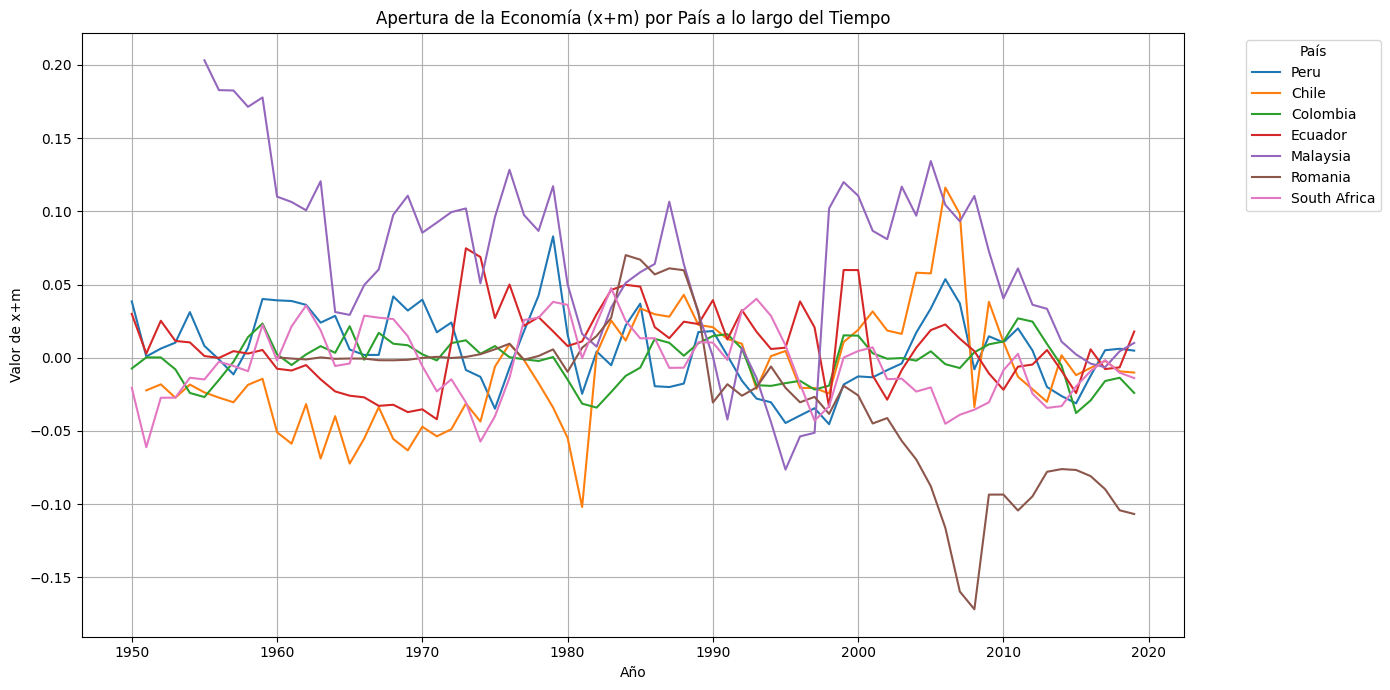

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la nueva columna 'x+m' sumando las columnas 'x' y 'm'
df['x+m'] = df['x'] + df['m']

# Seleccionar las columnas relevantes para el gráfico
plot_data_x_plus_m = df[['year', 'country', 'x+m']]

# Eliminar filas con valores nulos en la columna 'x+m' para asegurar una visualización limpia
plot_data_x_plus_m = plot_data_x_plus_m.dropna(subset=['x+m'])

# Crear el gráfico de serie de tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=plot_data_x_plus_m, x='year', y='x+m', hue='country')

plt.title('Apertura de la Economía (x+m) por País a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Valor de x+m')
plt.grid(True)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Tendencia General de Perú:

Perú comienza con un nivel de apertura relativamente bajo (alrededor de 0.01) en 1950 y presenta fluctuaciones significativas a lo largo del tiempo.
Muestra un período de mayor apertura en los años 70 (con picos cercanos a 0.05-0.08) y luego una caída.
A partir de los años 90, la apertura de Perú se mantiene en un rango más estable, alrededor de 0.0 a 0.02, con una ligera tendencia a la baja hacia 2020 (terminando en un valor negativo, lo que podría indicar un saldo comercial muy específico o alguna peculiaridad en los datos para el cálculo, aunque lo más común es que sea positivo).

### Pares Estructurales (Colombia, Ecuador, Sudáfrica):

-Ecuador: Inicia con un nivel bajo y muestra un crecimiento en los años 70 y 80, alcanzando picos alrededor de 0.05. Luego experimenta fluctuaciones, terminando en un rango similar a Perú.
- Colombia: Es notable por tener los niveles más bajos de apertura en la mayoría del período, a menudo fluctuando alrededor de 0.00 o incluso ligeramente negativos. Esto sugiere una economía históricamente menos integrada al comercio global en comparación con sus pares.
- Sudáfrica: Comienza con una apertura moderada (cercana a 0.05) y muestra una tendencia de aumento y fluctuación, terminando alrededor de 0.00 en 2020.

### Pares Aspiracionales (Chile, Malasia, Rumanía):

- Chile: Inicia con un nivel de apertura bajo y muy volátil (con valores negativos en algunos años de los 60), pero muestra un crecimiento significativo a partir de los 80, alcanzando picos de alrededor de 0.05-0.07. Termina en un nivel positivo pero no excepcionalmente alto en 2020.
- Malasia: Se destaca por tener, con diferencia, el nivel de apertura más alto y más consistente del grupo durante gran parte del período. Comienza con un nivel muy alto (cercano a 0.20) en 1950, experimenta fluctuaciones pero generalmente se mantiene en un rango alto, superando consistentemente a todos los demás países. Aunque tiene un descenso desde finales de los 90, sigue siendo el más abierto, con valores cercanos a 0.1 en 2020. Esto subraya su economía altamente orientada al comercio.
- Rumanía: También presenta una trayectoria con altibajos. Comienza con una apertura relativamente baja, pero muestra un crecimiento considerable a partir de los 90, alcanzando picos de alrededor de 0.1 y luego experimentando una fuerte caída hacia 2010 (con valores negativos significativos), recuperándose ligeramente hacia 2020. La fuerte caída podría reflejar cambios estructurales o crisis económicas.

### Consideraciones sobre los Valores Negativos:

- Interpretación: Es inusual que la suma de exportaciones e importaciones como proporción del PIB sea negativa en un gráfico de "apertura". Normalmente, este indicador siempre es positivo (e.g., (X+M)/PIB). Si los datos son correctos como se muestran, un valor negativo de (x+m) podría indicar que la métrica no es la suma simple de exportaciones e importaciones, sino alguna otra formulación que puede arrojar valores negativos, o que hay un error de interpretación o un uso particular del término "apertura".
- Posibles Causas (si es un diferencial): Si "x+m" fuera, por ejemplo, el saldo de la balanza comercial (exportaciones - importaciones) como porcentaje del PIB, entonces los valores negativos indicarían un déficit comercial. Sin embargo, el título del gráfico "Apertura de la Economía" sugiere una medida de volumen de comercio, no de saldo. Por lo tanto, la interpretación más directa es que hay algo particular en la métrica o en la escala del eje Y.

### Conclusiones Generales (asumiendo que los valores negativos son anómalos o representan algo específico no estándar):

- Malasia: Líder en Apertura: El gráfico confirma a Malasia como una economía excepcionalmente abierta e integrada en el comercio global, con un volumen de comercio significativamente mayor en relación con su PIB que el resto de los países.
- Volatilidad y Divergencia: Las trayectorias de apertura varían mucho entre los países, mostrando periodos de mayor o menor integración comercial. Algunos países (Chile) muestran un aumento de apertura, mientras que otros (Colombia, y a veces Perú y Sudáfrica) permanecen en niveles bajos o muestran menor integración.
- Rumanía: Grandes Fluctuaciones: El caso de Rumanía es notable por las grandes fluctuaciones en su apertura, incluyendo un período de fuerte contracción del comercio internacional.

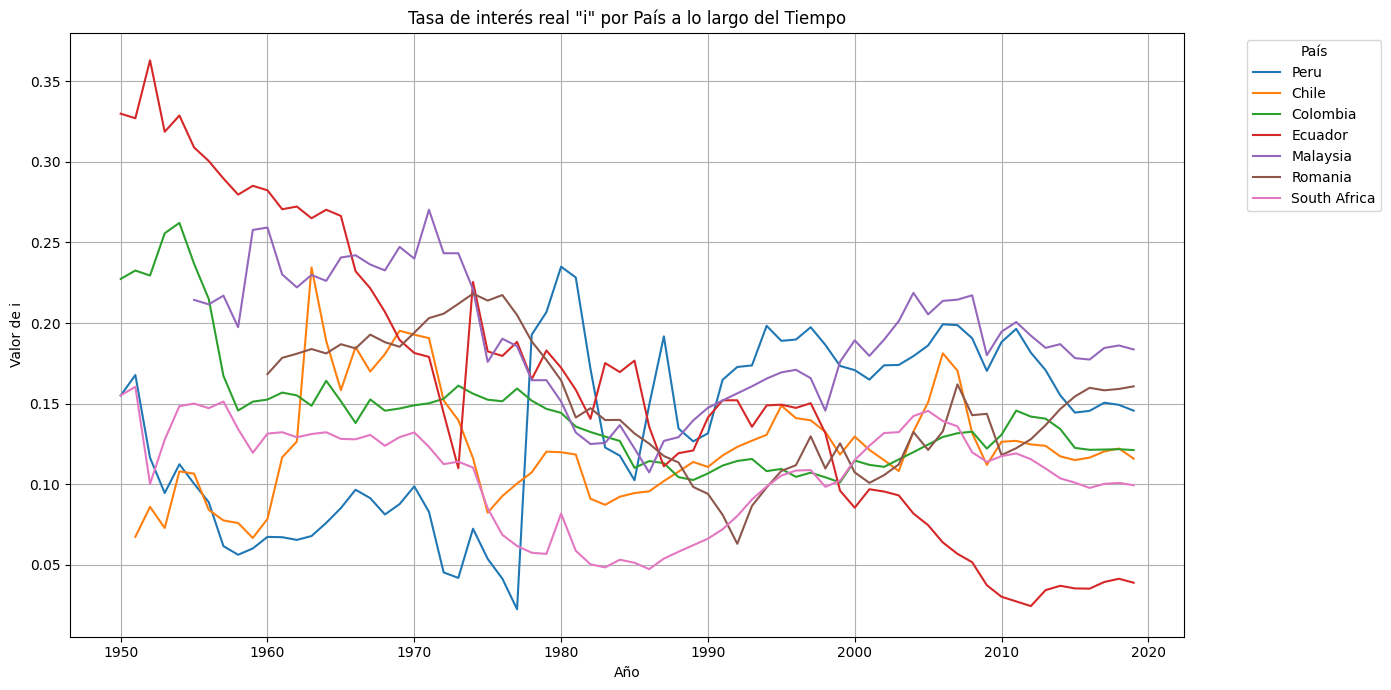

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas relevantes
plot_data_i = df[['year', 'country', 'i']]

# Eliminar filas con valores nulos en la columna 'i' para asegurar una visualización limpia
plot_data_i = plot_data_i.dropna(subset=['i'])

# Crear el gráfico de serie de tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=plot_data_i, x='year', y='i', hue='country')

plt.title('Tasa de interés real "i" por País a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Valor de i')
plt.grid(True)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Tendencia General de Perú:

Perú comienza con una tasa de interés real relativamente baja (alrededor de 0.05-0.07) en los años 50.
Su trayectoria es bastante volátil, con picos y valles pronunciados. Experimenta un aumento considerable a finales de los 70 y principios de los 80 (superando 0.20), seguido de una fuerte caída.
En las últimas décadas, la tasa de interés real de Perú se ha mantenido en un rango más estable, generalmente entre 0.10 y 0.20.

### Pares Estructurales (Colombia, Ecuador, Sudáfrica):

- Ecuador: Exhibe una de las tasas de interés real más altas en las primeras décadas (superando 0.35 en los 50). Luego, muestra una tendencia general a la baja, con fluctuaciones, terminando con una de las tasas más bajas del grupo (alrededor de 0.04) en 2020. Esto podría indicar periodos de alta inflación o políticas monetarias específicas.
- Colombia: Su tasa de interés real es más estable en comparación con Perú y Ecuador, generalmente oscilando entre 0.10 y 0.15 durante la mayor parte del período.
- Sudáfrica: Comienza con una tasa de interés real moderada, experimenta un ligero aumento y luego una tendencia a la baja a partir de los años 80, terminando en un nivel bajo (alrededor de 0.10) en 2020.

### Pares Aspiracionales (Chile, Malasia, Rumanía):

- Chile: Inicia con una tasa de interés real más alta que Perú, mostrando fluctuaciones considerables. A partir de los 80, su tasa es generalmente más alta y más volátil que la de Perú, oscilando entre 0.10 y 0.25 en las últimas décadas.
- Malasia: Muestra una tasa de interés real relativamente estable y en el rango medio del grupo (entre 0.10 y 0.15) durante la mayor parte del período, lo que podría indicar una política monetaria más predecible o una menor volatilidad económica.
- Rumanía: También presenta una tasa de interés real con fluctuaciones significativas. Comienza en un nivel alto, baja, y luego tiene un pico importante en los 90. En las últimas décadas, su tasa se estabiliza alrededor de 0.15, similar a otros países.

### Conclusiones Generales:

- Volatilidad Generalizada: La mayoría de los países, y especialmente los de América Latina (Perú, Ecuador, Chile), muestran una considerable volatilidad en sus tasas de interés reales a lo largo del tiempo. Esto puede reflejar periodos de alta inflación, inestabilidad macroeconómica, crisis de deuda o cambios bruscos en la política monetaria.
- Chile: Tasas Más Altas y Volátiles: A pesar de ser un país aspiracional, Chile exhibe una de las tasas de interés real más altas y volátiles en las últimas décadas, lo que puede ser un reflejo de políticas para controlar la inflación o atraer capital, o de la percepción de riesgo por los mercados.
- Malasia: Estabilidad Relativa: Malasia, otro par aspiracional, destaca por una tasa de interés real relativamente más estable en el rango medio, lo que podría indicar un entorno macroeconómico más predecible y atractivo para la inversión a largo plazo.
- Ecuador: Descenso Marcado: La fuerte caída en la tasa de interés real de Ecuador en las últimas décadas es notable y podría estar relacionada con factores como la dolarización o políticas de control de la inflación.
- Implicaciones para la Inversión: La tasa de interés real es un factor crucial para la inversión. Tasas de interés reales muy altas pueden desincentivar la inversión, mientras que tasas muy bajas o negativas pueden desalentar el ahorro. La estabilidad y previsibilidad de las tasas de interés reales son importantes para fomentar un entorno de inversión favorable.

A partir de la interpretación de los gráficos, la distinción de países pares estructurales y aspiracionales realizada por el Banco Mundial (según la descripción dada) parece ser en gran medida pertinente y está bien fundamentada en los datos mostrados.

### Los gráficos ilustran diferencias clave en indicadores económicos fundamentales que justifican esta categorización:

#### Análisis de la Pertinencia (Gráficos vs. Criterios del BM):

Criterios del Banco Mundial para la distinción:
"Se identificaron los pares estructurales y aspiracionales de acuerdo con sus indicadores de PIB per cápita, población, exportaciones de productos básicos, desempeño ambiental y gobernanza."

Aunque los gráficos no cubren todos estos criterios directamente (ej. población, desempeño ambiental, gobernanza detallada), sí ilustran métricas económicas clave que subyacen a la capacidad de un país para avanzar en esos otros criterios. Los gráficos analizados son:

- Productividad Total de Factores (PTF)
- Dotación de capital por trabajador (K/L)
- Participación del capital en la distribución del ingreso (alpha)
- Tasa de participación (L/N)
- Tasa de acumulación de capital (fbkf)
- Consumo del gobierno (cgob)
- Tamaño del sector exportador (x)
- Apertura de la Economía (x+m)
- Tasa de interés real (i)

#### Justificación para Pares Estructurales (Ecuador, Colombia, Sudáfrica):
Los gráficos muestran que Ecuador, Colombia y Sudáfrica tienden a compartir características y trayectorias económicas más cercanas a Perú en varios aspectos, justificando su agrupación como "estructurales":

- PTF: Si bien Perú tuvo una trayectoria más volátil, al final del período, las PTF de Perú, Colombia y Ecuador convergen en un rango similar alrededor de 1.0. Sudáfrica también converge aunque con una base diferente.
- K/L (Dotación de Capital por Trabajador): Colombia y Ecuador mantienen niveles de K/L históricamente inferiores a los países aspiracionales y más cercanos a Perú, aunque Perú los supera ligeramente al final. Sudáfrica, si bien tiene un K/L alto al principio, muestra una caída y una recuperación que la sitúa en un rango intermedio, justificando que no es un "aspiracional" en el mismo sentido que Chile o Malasia en términos de crecimiento sostenido del K/L.
- Participación del Capital (alpha) y Trabajo (1-alpha): Las dinámicas de distribución del ingreso para Colombia, Ecuador y Sudáfrica muestran patrones que, aunque no idénticos a Perú, reflejan desafíos o estructuras de mercado laboral y capital similares a las de economías en desarrollo con cierta dependencia de commodities.
- Tasa de Acumulación de Capital (fbkf): La fbkf de Perú, Colombia, Ecuador y Sudáfrica muestra rangos y fluctuaciones más comparables entre sí (generalmente por debajo del pico de Malasia), indicando ritmos de inversión similares.
- Tamaño del Sector Exportador (x): Perú, Ecuador y Sudáfrica muestran tamaños de sector exportador que, si bien crecen, son significativamente menores que los de Malasia y Chile en su apogeo. Colombia, de hecho, se mantiene con un sector exportador muy pequeño.
- Apertura de la Economía (x+m): Similar al tamaño del sector exportador, los niveles de apertura para Perú, Colombia, Ecuador y Sudáfrica son, en general, considerablemente más bajos y volátiles que los de Malasia (y en menor medida Chile).
Estas similitudes estructurales en la eficiencia (PTF), la inversión (K/L, fbkf) y la inserción comercial (x, x+m) hacen que sean referencias adecuadas para entender los desafíos y oportunidades similares que enfrenta Perú.

#### Justificación para Pares Aspiracionales (Chile, Malasia, Rumanía):
Los gráficos proporcionan una fuerte evidencia de por qué Chile, Malasia y Rumanía son considerados "aspiracionales" para Perú:

- PTF: Aunque al final convergen, Malasia y Rumanía mostraron períodos de PTF significativamente más altos que Perú en su desarrollo, y Chile también mostró un crecimiento robusto. Esto sugiere una mayor eficiencia económica en ciertos puntos de su trayectoria.
- K/L (Dotación de Capital por Trabajador): Este es uno de los indicadores más contundentes. Chile y Malasia exhiben niveles de capital por trabajador sustancialmente más altos y un crecimiento más sostenido y rápido que Perú y sus pares estructurales. Rumanía también mantuvo un K/L muy alto en sus primeras décadas. Una mayor dotación de capital por trabajador es directamente correlacionable con una mayor productividad y desarrollo económico.
- Capital Humano (Kh): Otro indicador muy fuerte. Chile y Malasia consistently muestran niveles de Capital Humano más altos y un crecimiento más pronunciado o sostenido que Perú y sus pares estructurales. Rumanía también inicia con un nivel alto. Esto es crucial, ya que un mayor capital humano es un motor fundamental de la productividad y el desarrollo.
- Tasa de Acumulación de Capital (fbkf): Malasia destaca enormemente aquí, con tasas de inversión muy superiores a las de Perú y los pares estructurales durante períodos prolongados, lo que explica su rápido crecimiento de K/L. Chile también muestra un sólido desempeño en inversión.
- Tamaño del Sector Exportador (x) y Apertura (x+m): Malasia es un claro ejemplo. Su sector exportador es masivo en relación con su PIB, y su apertura comercial es la más alta del grupo, demostrando una integración exitosa en la economía global. Chile también muestra una mayor apertura y dependencia de las exportaciones que Perú y sus pares estructurales.

  Estos países han logrado superar a Perú en indicadores clave de desarrollo económico (especialmente capital por trabajador y capital humano) y en estrategias de crecimiento (como la alta inversión y la orientación exportadora en Malasia, o la solidez institucional y comercial de Chile).

### **Conclusión Final:**

Sí, la interpretación de los gráficos elaborados sustenta y valida la pertinencia de la distinción de países pares estructurales y aspiracionales que realiza el Banco Mundial.

Los "pares estructurales" comparten con Perú una base de recursos, un nivel de desarrollo y desafíos económicos que los hacen comparables en su "estructura". Los "pares aspiracionales", por otro lado, demuestran un rendimiento superior en métricas clave de desarrollo económico (como la acumulación de capital, capital humano y apertura comercial) que Perú y sus pares estructurales aún no han alcanzado de manera consistente, lo que los convierte en modelos a seguir en la búsqueda de un mayor crecimiento y bienestar.